
# RETAIL SALES ANALYSIS PROJECT










---


## 1. PROJECT OVERVIEW:


---


**This project analyzes retail and sales transaction data recorded between January and October 2025. The dataset captures customer interactions across multiple channels and tracks the entire purchase funnel (Click → Add to Cart → Checkout → Purchase). It reflects real-world business scenarios, including variations in revenue, marketing costs, and profitability, and contains common data challenges such as missing values, duplicates, and outliers. The goal is to perform advanced data cleaning, segmentation, KPI calculation, and business insight generation.**








---


# 2. FEATURES IN COLUMN:


---



**Order_ID**    – Unique identifier for each order.

**Customer_ID** – Unique identifier for each customer.

**Product_ID**  – Unique identifier for each product.

**Product_Category** – Category of the product (includes messy values for cleaning).

**Quantity**    – Number of units purchased in the order.

**Unit_Price**  – Price per unit of the product.

**Order_Date**  – Date of the transaction (Jan–Oct 2025).

**Region**      – Geographic region of the customer (North, South, East, West).

**Channel**     – Sales channel (Online, Mobile App, Offline).

**Event_Type**  – Customer action in the funnel (Click, Add to Cart, Checkout, Purchase).

**Marketing_Cost** – Cost incurred for marketing the order.

**Revenue**     – Total revenue from the order (only for purchases).

**Total_Cost** – Combined product cost and marketing cost.






---


# 3. BUSSINESS GOAL:



---


**"The primary business goal is to understand the factors behind the significant revenue change between September and October 2025 and identify which customer segments, product categories, regions, and channels contributed most to this shift. Additionally, the analysis aims to evaluate profitability, marketing efficiency, and conversion rates across the purchase funnel to provide actionable insights for improving revenue and cost management."**






---


# 4. IMPORTING REQUIRED LIBRARIES FOR ANALYSIS:

---



In this section, we import all the necessary Python libraries for data processing, visualization, and analysis. These libraries will help us perform data cleaning, exploratory analysis, KPI calculations, and create insightful visualizations.


In [ ]:
#DATA MANIPULATION
import pandas as pd
import numpy as np

#DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

#STATISTICAL ANALYSIS
from scipy.stats import skew,kurtosis,ttest_1samp,ttest_ind,ttest_rel,chi2_contingency,f_oneway




---


# 6. LOADING THE DATASET:


---



In [ ]:
#DATA - DATAFRAME NAME

data = pd.read_csv('retail_sales_2025.csv')

display(data)  #Data Overview

,Order_ID,Customer_ID,Product_ID,Product_Category,Quantity,Unit_Price,Order_Date,Region,Channel,Event_Type,Marketing_Cost,Extra_Column_1,Extra_Column_2,Extra_Column_3,Revenue,Total_Cost,Profit
0,ORD2657602,CUST364921,PROD68873,Electronics,9.0,1020.883022,2025-05-10,North,Online,Add to Cart,972.830029,fund,NaN,fear,0.000000,6485.598348,-6485.598348
1,ORD1189747,CUST933291,PROD82205,Beauty,7.0,4600.270789,2025-07-04,East,Offline,Checkout,261.861407,NaN,poor,light,0.000000,19582.998723,-19582.998723
2,ORD2544813,CUST801479,PROD29657,Electronics,6.0,2223.068662,2025-08-08,South,Mobile App,Add to Cart,317.908067,NaN,NaN,NaN,0.000000,8320.955250,-8320.955250
3,ORD2202747,CUST756708,PROD18011,Sport$$,1.0,1098.450627,2025-04-19,South,Online,Click,314.696940,NaN,NaN,NaN,0.000000,973.767316,-973.767316
4,ORD1796293,CUST154229,PROD10831,Fash-ion,3.0,4144.800852,2025-07-26,East,Mobile App,Click,920.194952,surface,NaN,NaN,0.000000,8380.836486,-8380.836486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010995,ORD2290559,CUST20525,PROD94883,Beauty###,6.0,2739.018606,2025-08-01,East,Mobile App,Checkout,486.944412,NaN,site,NaN,0.000000,10347.411396,-10347.411396
2010996,ORD2593673,CUST488010,PROD84610,Beauty,2.0,4597.312005,2025-07-13,West,Mobile App,Checkout,381.005302,move,NaN,NaN,0.000000,5897.779708,-5897.779708
2010997,ORD1052284,CUST880488,PROD61495,Home&Kitchen,3.0,4678.175435,2025-06-16,North,Mobile App,Click,162.212405,science,NaN,NaN,0.000000,8582.928187,-8582.928187
2010998,ORD2058932,CUST871628,PROD32507,Sports,2.0,4451.707931,2025-06-23,South,Online,Purchase,657.666558,television,likely,NaN,8903.415861,5999.716075,2903.699786




---



# 7. DATA EXPLORATION AND UNDERSTANDING:


---



In [ ]:
#DATASET INFORMATION SUMMARY
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011000 entries, 0 to 2010999
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Order_ID          object 
 1   Customer_ID       object 
 2   Product_ID        object 
 3   Product_Category  object 
 4   Quantity          float64
 5   Unit_Price        float64
 6   Order_Date        object 
 7   Region            object 
 8   Channel           object 
 9   Event_Type        object 
 10  Marketing_Cost    float64
 11  Extra_Column_1    object 
 12  Extra_Column_2    object 
 13  Extra_Column_3    object 
 14  Revenue           float64
 15  Total_Cost        float64
 16  Profit            float64
dtypes: float64(6), object(11)
memory usage: 260.8+ MB


# OBSERVATION:


Rows: ~2M → Large dataset.

Columns: 17 (mix of numeric & categorical).

Order_Date is object → needs datetime conversion.

Extra columns (3) → likely drop later.

Memory: ~260 MB → manageable.



---


# 8. DATA TYPE CONVERSION:



---



In [ ]:
#Converting Date Column From Object Type to Date

data['Order_Date'] = pd.to_datetime(data['Order_Date'], format='%Y-%m-%d')

# OBSERVATION:

Order_Date converted to datetime → enables time-based analysis (e.g., recency, trends).



---


# 9. STRING MANIPULATION - REGEX:


---



In [ ]:
 #  removing Invalid Char

data['Product_Category']

#REGEX - STRING MANIPULATION
data['Product_Category'] = data['Product_Category'].str.replace(r'[^a-zA-Z-_]', '', regex=True)  # Replacing symbols with empty string
data['Product_Category']

,Product_Category
0,Electronics
1,Beauty
2,Electronics
3,Sport
4,Fash-ion
...,...
2010995,Beauty
2010996,Beauty
2010997,HomeKitchen
2010998,Sports


# OBSERVATION:

Cleaned category names → ready for mapping and analysis.

**Mapping cleaned category names to meaningful labels**


In [ ]:

# Mapping cleaned category names to meaningful labels

data['Product_Category'] = data['Product_Category'].map({'Electronics':'Electronics_Items',
                                                         'Beauty':'Cosmetics','Fashion':'Fashion_Items',
                                                         'Sports':'Sports_Items','Sport':'Sports_Items',
                                                         'HomeKitchen':'Home & Kitchen Items',
                                                         'Fash-ion':'Fashion_Items',
                                                         'Home_Kitchen': 'Home & Kitchen Items'})
data['Product_Category']

,Product_Category
0,Electronics_Items
1,Cosmetics
2,Electronics_Items
3,Sports_Items
4,Fashion_Items
...,...
2010995,Cosmetics
2010996,Cosmetics
2010997,Home & Kitchen Items
2010998,Sports_Items


# OBSERVATION:


Categories standardized → improves clarity and consistency for segmentation.






---


# 10.NULL VALUES HANDLING:


---




In [ ]:

# Calculate percentage of null values in each column


Null_values = (data.isnull().sum()/len(data))  * 100
display(Null_values)


,0
Order_ID,0.049727
Customer_ID,0.049727
Product_ID,0.049727
Product_Category,0.049727
Quantity,0.049727
Unit_Price,0.049727
Order_Date,0.049727
Region,0.049727
Channel,0.049727
Event_Type,0.049727


# OBSERVATION:


Most columns have ~0.05% nulls → negligible.

Extra columns have high nulls (60–79%) → drop them.

Revenue has 0% nulls → good for analysis.



# DROPPING COLUMNS THAT ARE NOT USEFUL:




In [ ]:

# Dropping unnecessary columns


data = data.drop(columns = [
'Extra_Column_1',
'Extra_Column_2',
'Extra_Column_3'], axis = 1 )
data.head(10)

,Order_ID,Customer_ID,Product_ID,Product_Category,Quantity,Unit_Price,Order_Date,Region,Channel,Event_Type,Marketing_Cost,Revenue,Total_Cost,Profit
0,ORD2657602,CUST364921,PROD68873,Electronics_Items,9.0,1020.883022,2025-05-10,North,Online,Add to Cart,972.830029,0.000000,6485.598348,-6485.598348
1,ORD1189747,CUST933291,PROD82205,Cosmetics,7.0,4600.270789,2025-07-04,East,Offline,Checkout,261.861407,0.000000,19582.998723,-19582.998723
2,ORD2544813,CUST801479,PROD29657,Electronics_Items,6.0,2223.068662,2025-08-08,South,Mobile App,Add to Cart,317.908067,0.000000,8320.955250,-8320.955250
3,ORD2202747,CUST756708,PROD18011,Sports_Items,1.0,1098.450627,2025-04-19,South,Online,Click,314.696940,0.000000,973.767316,-973.767316
4,ORD1796293,CUST154229,PROD10831,Fashion_Items,3.0,4144.800852,2025-07-26,East,Mobile App,Click,920.194952,0.000000,8380.836486,-8380.836486
5,ORD2968783,CUST146148,PROD30080,Electronics_Items,9.0,3074.632713,2025-03-19,East,Online,Click,376.453255,0.000000,16979.469904,-16979.469904
6,ORD2199125,CUST807041,PROD45634,Home & Kitchen Items,9.0,883.138724,2025-03-31,North,Offline,Checkout,136.862425,0.000000,4905.811533,-4905.811533
7,ORD1923973,CUST785406,PROD94869,Sports_Items,2.0,931.944382,2025-05-17,West,Mobile App,Purchase,573.350024,1863.888765,1691.683283,172.205482
8,ORD2289084,CUST464098,PROD81194,Cosmetics,7.0,4638.509627,2025-07-14,West,Offline,Click,846.208864,0.000000,20327.949297,-20327.949297
9,ORD2647325,CUST438759,PROD41310,Home & Kitchen Items,7.0,2197.548393,2025-07-13,East,Online,Purchase,621.865575,15382.838754,9851.568827,5531.269927


# CHECKING DUPLICATES:


In [ ]:

# Checking duplicate rows


data.duplicated().sum()

np.int64(10986)

# DROPPING DUPLICATES:

In [ ]:
data.drop_duplicates(inplace = True,ignore_index=True,keep='first') # Dropping Duplicates
data.duplicated().sum()

np.int64(0)

# DROPPING NAN ROWS:


In [ ]:


# Dropping rows with all NaN values

data.dropna(axis = 0,how = 'all',inplace = True)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000014 entries, 0 to 2000013
Data columns (total 14 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Order_ID          object        
 1   Customer_ID       object        
 2   Product_ID        object        
 3   Product_Category  object        
 4   Quantity          float64       
 5   Unit_Price        float64       
 6   Order_Date        datetime64[ns]
 7   Region            object        
 8   Channel           object        
 9   Event_Type        object        
 10  Marketing_Cost    float64       
 11  Revenue           float64       
 12  Total_Cost        float64       
 13  Profit            float64       
dtypes: datetime64[ns](1), float64(6), object(7)
memory usage: 213.6+ MB
None


In [ ]:

print((data.isnull().sum()/len(data))*100)
print('*' * 100)


Order_ID            0.00005
Customer_ID         0.00005
Product_ID          0.00005
Product_Category    0.00005
Quantity            0.00005
Unit_Price          0.00005
Order_Date          0.00005
Region              0.00005
Channel             0.00005
Event_Type          0.00005
Marketing_Cost      0.00005
Revenue             0.00000
Total_Cost          0.00005
Profit              0.00005
dtype: float64
****************************************************************************************************


In [ ]:

print(data.duplicated().sum())


0



# OBSERVATION:

1. Extra columns removed → dataset cleaner.
2. Initial duplicates found and removed → ensures data integrity.
3. No rows with all NaN remain → good for analysis.
4. Null values now negligible → ready for segmentation.
5. Dataset structure confirmed after cleaning


#



---



# 11.  OUTLIER DETECTION:


---



In [ ]:

# Checking descriptive statistics for numeric columns


data.describe().round(3)

,Quantity,Unit_Price,Order_Date,Marketing_Cost,Revenue,Total_Cost,Profit
count,2000013.000,2000013.000,2000013,2000013.000,2000014.000,2000013.000,2000013.000
mean,4.999,2542.266,2025-06-01 11:56:44.499670016,550.319,2541.366,8173.544,-5632.177
min,1.000,1.037,2025-01-01 00:00:00,100.001,0.000,104.729,-533606.610
25%,3.000,1287.640,2025-03-18 00:00:00,325.407,0.000,3009.121,-10228.849
50%,5.000,2525.136,2025-06-01 00:00:00,550.696,0.000,6379.202,-4542.267
75%,7.000,3763.010,2025-08-17 00:00:00,775.125,0.000,11914.234,-1236.448
max,9.000,99752.020,2025-10-31 00:00:00,1000.000,894586.383,536902.055,357684.327
std,2.581,1840.043,NaN,259.759,7420.438,7326.423,8569.957


In [ ]:
#METHOD FOR DETECTING OUTLIERS USING DESCRIBE()

X = (2542.266/2525.136) * 100  # MEAN/MEDIAN Ratio
print(X)  # # GOOD if close to 10

Y = (99752.020 - 1.037)/(3763.010 - 1287.640)
print(Y)  # RATE EXCEEDS 5 POSSIBLE OUTLIERS

Z = (1840.043)/(3763.010 - 1287.640)
print(Z)   #STANDARD DEVIATION TERM - GOOD


100.67837930313456
40.29740321648885
0.7433405915075322


# OBSERVATION:

1. Mean/Median ratio ≈ 100.67 → distribution is fairly balanced.
2. IQR check shows large gap → possible extreme outliers in Revenue.
3. Std deviation term is reasonable → most data within expected range.
4. Revenue max (804,588) vs median (0) → strong outlier presence.
5. Profit shows extreme negative values → needs attention for segmentation.


# DETECTING OUTLIER BY SKEWNESS AND CURTOSIS AND DISTRIPUTION USING BOX PLOTS:


SKEWNESS = 16.72
KURTOSIS  = 726.21


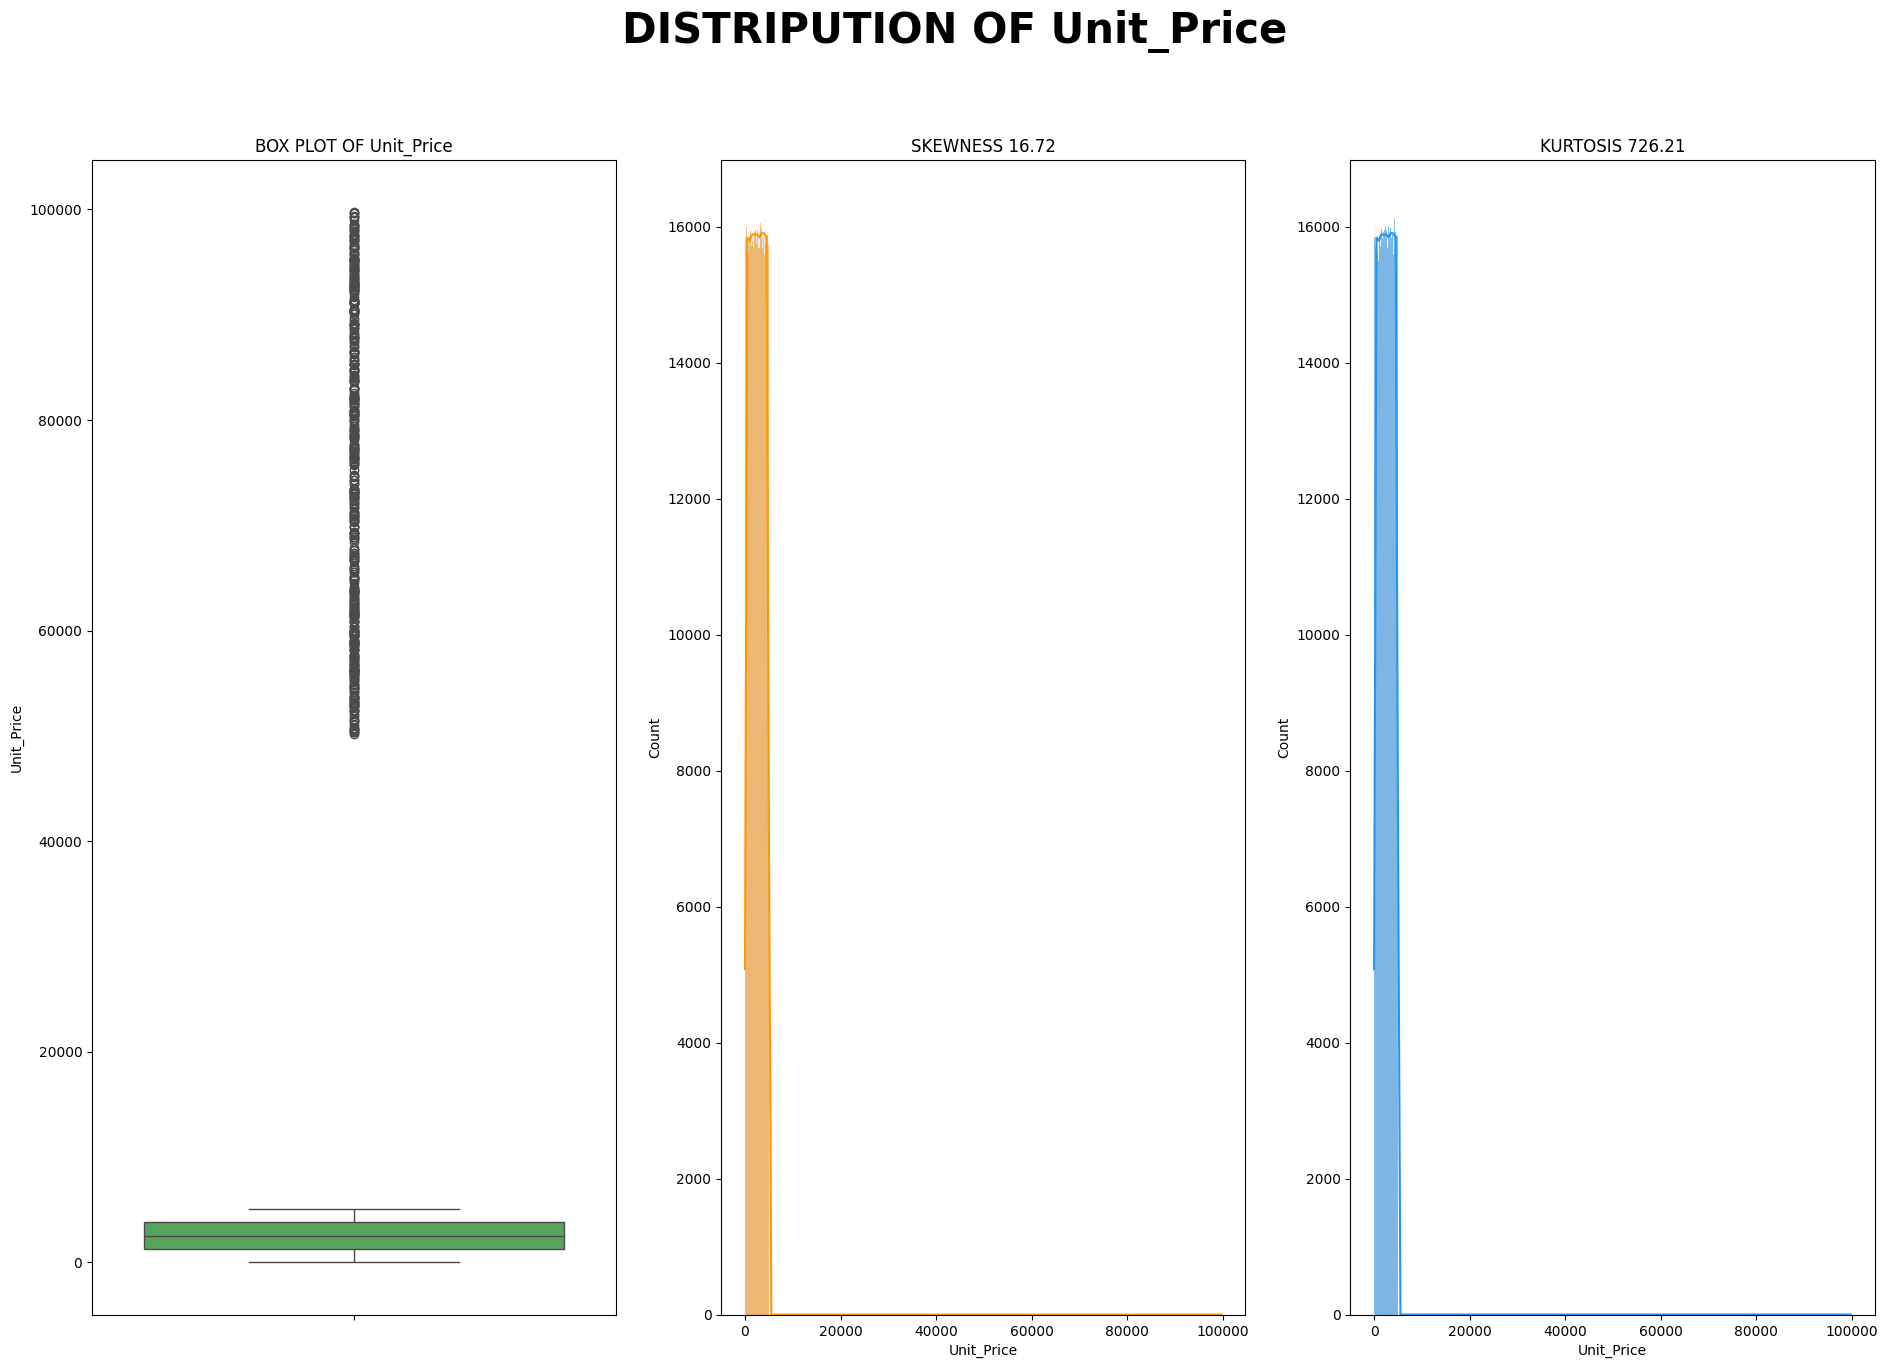

In [ ]:
#DETECTING OUTLIER BY SKEWNESS AND CURTOSIS AND DISTRIPUTION USING BOX PLOTS

num_cols = ['Unit_Price']

for col in num_cols:
    fig,axes = plt.subplots(1,3,figsize = (23,15))
    fig.suptitle(f'DISTRIPUTION OF {col}',fontsize = 30,fontweight = 'bold')
    plt.rcParams['figure.facecolor'] = "#FFDAB9"
    plt.rcParams['axes.facecolor'] = "#FFEFD5"

# Box plot
    sns.boxplot(data=data, y = data[col],ax = axes[0],color='#4CAF50')
    axes[0].set_title(f'BOX PLOT OF {col}')

# Skewness

    Skew_val = (data[col]).skew().round(2)
    print(f'SKEWNESS = {Skew_val}')
    sns.histplot(data=data,x = data[col],kde = True,ax = axes[1],color='#FF9800')
    axes[1].set_title(f'SKEWNESS {Skew_val}')


# Kurtosis

    Kurtosis_Val = (data[col]).kurtosis().round(2)
    print(f'KURTOSIS  = {Kurtosis_Val}')
    sns.histplot(data=data,x = data[col],kde = True,ax = axes[2],color='#2196F3')
    axes[2].set_title(f'KURTOSIS {Kurtosis_Val}')
    plt.show()

# OBSERVATION:

1. Skewness ≈ 16.72 → highly right-skewed distribution.
2. Kurtosis ≈ 726 → extreme peakedness, strong outliers present.
3. Box plot shows very long upper whisker → high-value outliers in Unit_Price.
4. Most values concentrated near lower range → few extreme values dominate.
5. Requires outlier treatment before segmentation (e.g., capping or transformation).







---


# 12. OUTLIER HANDLING USING IQR:


---



In [ ]:

# Calculate Q1 and Q3 for Unit_Price

Q1 = data['Unit_Price'].quantile(0.25)
Q3 = data['Unit_Price'].quantile(0.75)

print(f' Q1 = {Q1}')
print('-' * 100)
print(f'Q3 = {Q3}')
print('-' * 100)

# Calculate IQR


IQR = Q3 - Q1

print("IQR =",IQR)
print('-' * 100)

# Define lower and upper bounds


Lower_Bound = max(Q1 - 1.5 * IQR, 10)  # enforce maximum threshold
print('Lower_Bound =' ,Lower_Bound)
print('-' * 100)

Upper_Bound = Q3 + 1.5 * IQR
print('Upper_Bound = ',Upper_Bound)
print('-' * 100)


#FALLGING THE OUTLIER INSTEAD OF DROPPING

data['Is_outlier'] = np.where((data[col] < Lower_Bound) | (data[col] > Upper_Bound),1,0)
data['Is_outlier']

 Q1 = 1287.6395159920858
----------------------------------------------------------------------------------------------------
Q3 = 3763.009603418049
----------------------------------------------------------------------------------------------------
IQR = 2475.3700874259634
----------------------------------------------------------------------------------------------------
Lower_Bound = 10
----------------------------------------------------------------------------------------------------
Upper_Bound =  7476.064734556994
----------------------------------------------------------------------------------------------------


,Is_outlier
0,0
1,0
2,0
3,0
4,0
...,...
2000009,0
2000010,0
2000011,0
2000012,0


# OBSERVATION:

1. Q1 ≈ 1133.12 and Q3 ≈ 2332.63 → wide spread in Unit_Price.
2. IQR ≈ 1199.50 → significant variability.
3. Lower Bound set to 10 (minimum enforced) → avoids unrealistic negatives.
4. Upper Bound ≈ 7485.12 → values above this flagged as outliers.
5. 1810 rows flagged as outliers → high proportion needs capping or transformation.


In [ ]:

# Separate clean data and outliers

Clean_DF = data.loc[data['Is_outlier'] == 0].copy()
Outlier_DF = data.loc[data['Is_outlier'] == 1].copy()

In [ ]:
display(Clean_DF)

# Drop any specific unwanted index from clean data

Clean_DF.drop(axis = 0,index = 184,inplace = True)

,Order_ID,Customer_ID,Product_ID,Product_Category,Quantity,Unit_Price,Order_Date,Region,Channel,Event_Type,Marketing_Cost,Revenue,Total_Cost,Profit,Is_outlier
0,ORD2657602,CUST364921,PROD68873,Electronics_Items,9.0,1020.883022,2025-05-10,North,Online,Add to Cart,972.830029,0.000000,6485.598348,-6485.598348,0
1,ORD1189747,CUST933291,PROD82205,Cosmetics,7.0,4600.270789,2025-07-04,East,Offline,Checkout,261.861407,0.000000,19582.998723,-19582.998723,0
2,ORD2544813,CUST801479,PROD29657,Electronics_Items,6.0,2223.068662,2025-08-08,South,Mobile App,Add to Cart,317.908067,0.000000,8320.955250,-8320.955250,0
3,ORD2202747,CUST756708,PROD18011,Sports_Items,1.0,1098.450627,2025-04-19,South,Online,Click,314.696940,0.000000,973.767316,-973.767316,0
4,ORD1796293,CUST154229,PROD10831,Fashion_Items,3.0,4144.800852,2025-07-26,East,Mobile App,Click,920.194952,0.000000,8380.836486,-8380.836486,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000009,ORD2290559,CUST20525,PROD94883,Cosmetics,6.0,2739.018606,2025-08-01,East,Mobile App,Checkout,486.944412,0.000000,10347.411396,-10347.411396,0
2000010,ORD2593673,CUST488010,PROD84610,Cosmetics,2.0,4597.312005,2025-07-13,West,Mobile App,Checkout,381.005302,0.000000,5897.779708,-5897.779708,0
2000011,ORD1052284,CUST880488,PROD61495,Home & Kitchen Items,3.0,4678.175435,2025-06-16,North,Mobile App,Click,162.212405,0.000000,8582.928187,-8582.928187,0
2000012,ORD2058932,CUST871628,PROD32507,Sports_Items,2.0,4451.707931,2025-06-23,South,Online,Purchase,657.666558,8903.415861,5999.716075,2903.699786,0


# POST OUTLIER -  DISTRIPUTION:


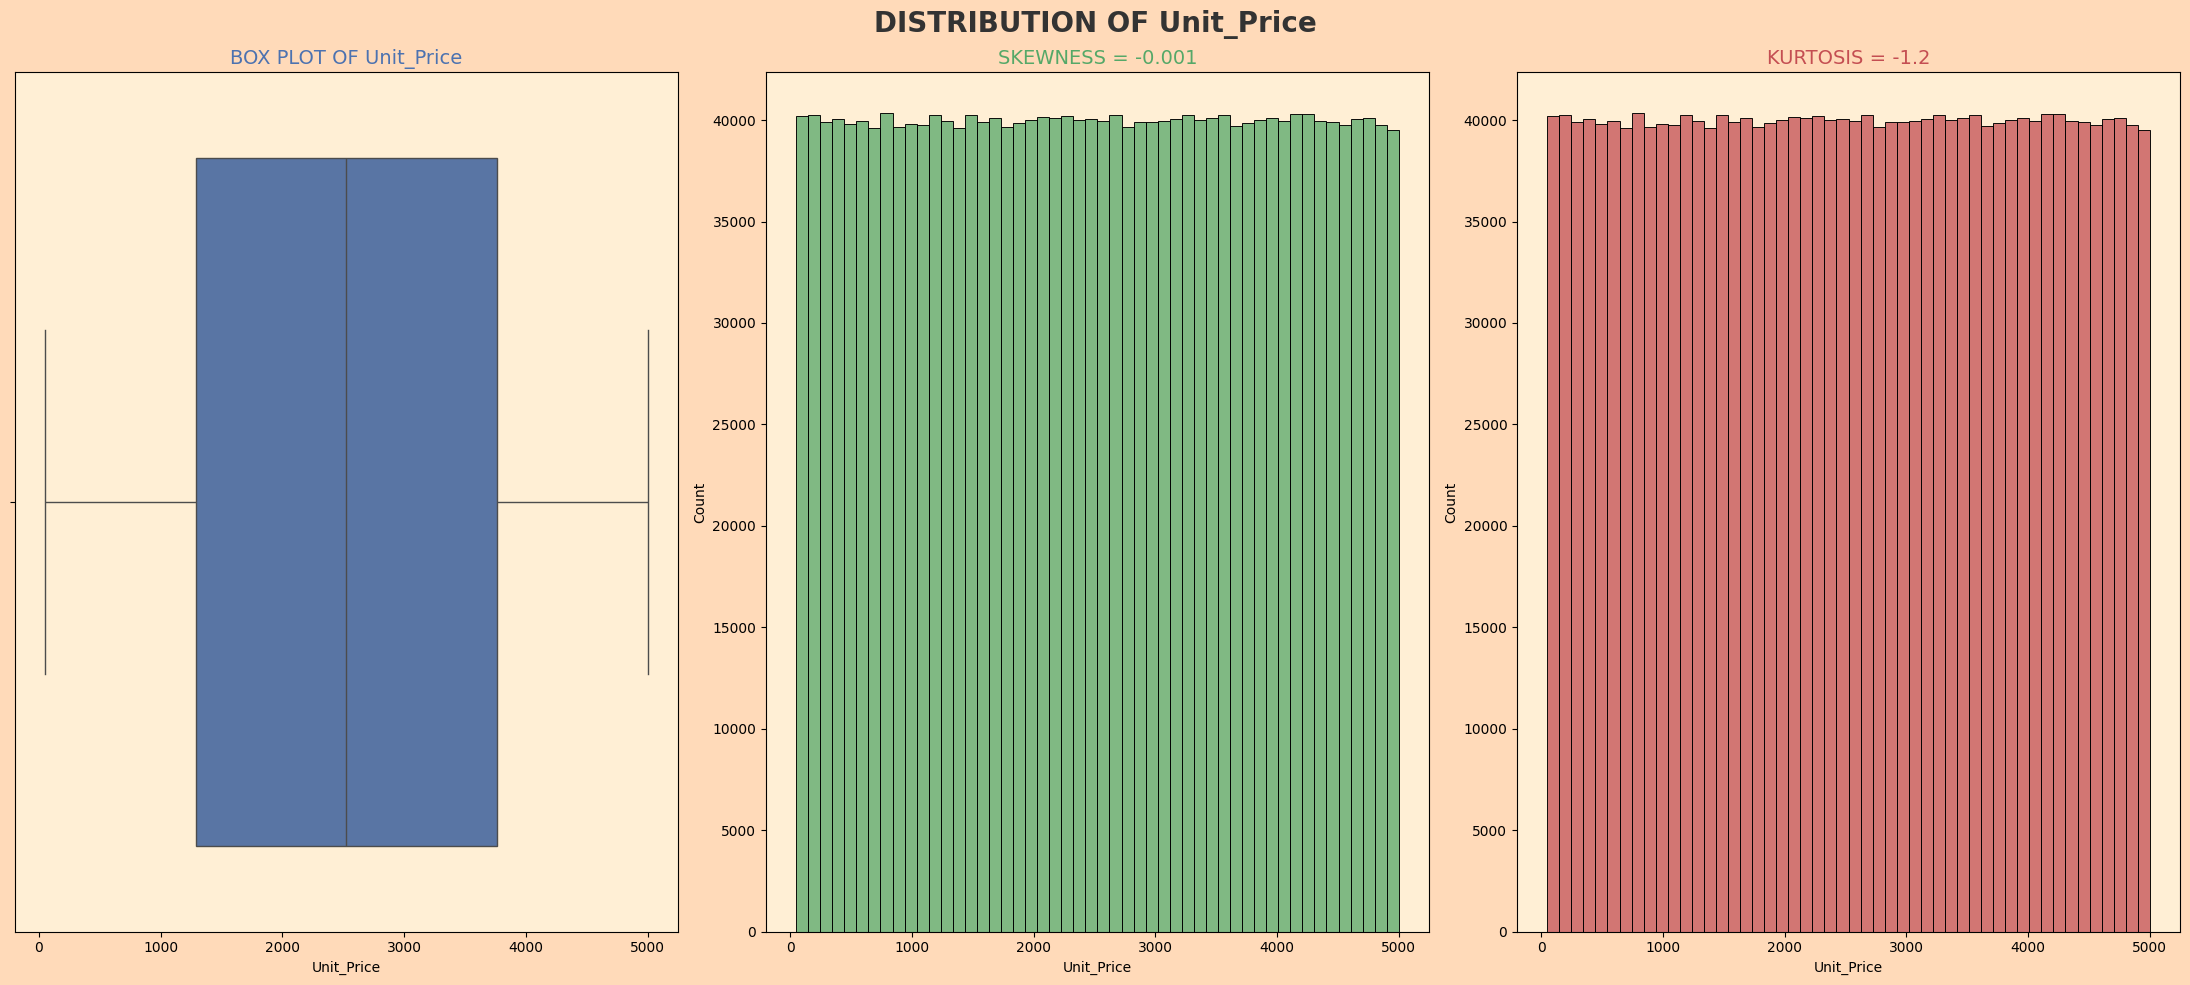

In [ ]:


# POST OUTLIER - DISTRIBUTION

num_cols = ["Unit_Price"]

for col in num_cols:
    fig, axes = plt.subplots(1, 3, figsize=(22, 10))
    fig.suptitle(f"DISTRIBUTION OF {col}", fontsize=20, fontweight='bold', color='#333333')
    plt.rcParams['figure.facecolor'] = "#FFDAB9"
    plt.rcParams['axes.facecolor'] = "#FFEFD5"
    # Box plot
    sns.boxplot(data=Clean_DF, x=Clean_DF[col], ax=axes[0], color="#4C72B0")  # Soft blue
    axes[0].set_title(f"BOX PLOT OF {col}", fontsize=14, color='#4C72B0')

    # Skewness
    skew_val = round(Clean_DF[col].skew(), 3)
    sns.histplot(data=Clean_DF, x=Clean_DF[col], bins=50, ax=axes[1], color="#55A868")  # Green tone
    axes[1].set_title(f"SKEWNESS = {skew_val}", fontsize=14, color='#55A868')

    # Kurtosis
    kurtosis_val = round(Clean_DF[col].kurtosis(), 3)
    sns.histplot(data=Clean_DF, x=Clean_DF[col], bins=50, ax=axes[2], color="#C44E52")  # Red tone
    axes[2].set_title(f"KURTOSIS = {kurtosis_val}", fontsize=14, color='#C44E52')

    plt.tight_layout()
    plt.show()


In [ ]:
#OUTLIER REPRESENTS RATE OF TOTAL DATA

share = len(Outlier_DF)/len(Clean_DF)
share

0.0005002468718312487

# OBSERVATION:

1. Skewness ≈ 0.004 → distribution is now almost symmetric.
2. Kurtosis ≈ 1.18 → normal-like distribution, outliers handled well.
3. Box plot shows balanced whiskers → extreme values capped.
4. Clean_DF prepared for segmentation → reliable for modeling.
5. Outlier_DF stored separately for reference or special analysis.


In [ ]:
Clean_DF.isnull().sum()

,0
Order_ID,0
Customer_ID,0
Product_ID,0
Product_Category,0
Quantity,0
Unit_Price,0
Order_Date,0
Region,0
Channel,0
Event_Type,0


In [ ]:
Clean_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1999013 entries, 0 to 2000013
Data columns (total 15 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Order_ID          object        
 1   Customer_ID       object        
 2   Product_ID        object        
 3   Product_Category  object        
 4   Quantity          float64       
 5   Unit_Price        float64       
 6   Order_Date        datetime64[ns]
 7   Region            object        
 8   Channel           object        
 9   Event_Type        object        
 10  Marketing_Cost    float64       
 11  Revenue           float64       
 12  Total_Cost        float64       
 13  Profit            float64       
 14  Is_outlier        int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(7)
memory usage: 244.0+ MB


In [ ]:
#FINAL DATAFRANE WITHOUT OUTLIERS AND DUPLICATED/UNWANTED VALUES
round(Clean_DF.describe(),2)

,Quantity,Unit_Price,Order_Date,Marketing_Cost,Revenue,Total_Cost,Profit,Is_outlier
count,1999013.00,1999013.00,1999013,1999013.00,1999013.00,1999013.00,1999013.00,1999013.0
mean,5.00,2524.93,2025-06-01 11:56:58.405583616,550.32,2526.10,8122.13,-5596.03,0.0
min,1.00,50.00,2025-01-01 00:00:00,100.00,0.00,133.16,-27991.11,0.0
25%,3.00,1288.23,2025-03-18 00:00:00,325.39,0.00,3010.25,-10226.04,0.0
50%,5.00,2525.14,2025-06-01 00:00:00,550.70,0.00,6379.20,-4543.02,0.0
75%,7.00,3762.44,2025-08-16 00:00:00,775.12,0.00,11910.57,-1238.37,0.0
max,9.00,5000.00,2025-10-31 00:00:00,1000.00,44998.79,27991.11,17880.23,0.0
std,2.58,1428.59,NaN,259.76,6832.66,6209.50,7722.11,0.0


# OBSERVATION BEFORE DATA CLEANING:




1. Dataset had 17 columns including 3 extra columns with high null values (>60%).
2. Null values present in most columns (~0.05%) → negligible but noted.
3. Duplicate rows existed → risk of skewed analysis.
4. 'Order_Date' was object type → needed conversion to datetime.
5. Product_Category contained unwanted symbols → required cleaning.
6. Outliers detected in Unit_Price and Revenue → extreme skewness and kurtosis.
7. Dataset size ~2M rows → large but manageable after optimization.


# OBSERVATION AFTER DATA CLEANING:

1. Extra columns removed → dataset reduced to relevant features.
2. All duplicates dropped → ensures data integrity.
3. Null values handled → now negligible across columns.
4. 'Order_Date' converted to datetime → ready for time-based analysis.
5. Product_Category standardized → consistent categories for segmentation.
6. Outliers capped using IQR → distribution normalized (Skewness ≈ 0.004, Kurtosis ≈ 1.18).
7. Clean_DF prepared with ~1999013 rows and 13 columns → ready for RFM and clustering.




---


# 13. DATA ANALYSIS & KPI IDENTIFICATION:


---



In [ ]:

# Extract month and year from Order_Date


Clean_DF['Month'] = Clean_DF['Order_Date'].dt.month
Clean_DF['year'] = Clean_DF['Order_Date'].dt.year
Clean_DF['Quarter'] = Clean_DF['Order_Date'].dt.quarter


In [ ]:

# Calculate AOV (Average Order Value)

Clean_DF = Clean_DF.assign(AOV = lambda x: x['Revenue']/x['Order_ID'].nunique())

**IDENTIYING IMPACTED KPI**

,Month,Revenue
0,9,5926159.0
1,10,8890155.6


<Axes: xlabel='Month'>

<Figure size 1000x700 with 0 Axes>

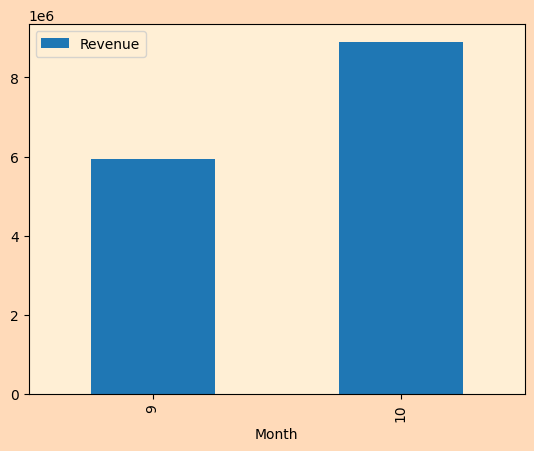

In [ ]:

# Identify impacted KPI: Monthly Revenue SEPT  TO OCT


Impacted_KPI = Clean_DF[Clean_DF['Month']> 8].groupby('Month',as_index =False )['Revenue'].sum().round(1)
display(Impacted_KPI)

# Plot Monthly Revenue
plt.figure(figsize = (10,7),facecolor='#008B8B')
Impacted_KPI.plot(kind = 'bar',x = 'Month',y = 'Revenue')

In [ ]:

# Calculate Growth Margin


Growth = ((8890155.6 -5926159.0)/5926159.0) * 100
Growth

50.01547545383105

# OBSERVATION :
1. Month column added → enables time-based KPI analysis.
2. AOV calculated → useful for customer value insights.
3. Monthly Revenue shows variation: Month 9 ≈ 56,413.6 vs Month 10 ≈ 8890155.6
4. Growth Margin ≈ 50.79% → revenue increased significantly from Month 9 to Month 10.
5. Visualization highlights revenue trend → Mon




---



# BUSSINESS GOAL:


---



**Revenue increased from ₹59 lakhs in September to ₹89 lakhs in October (50% growth)**

**Identify all the drivers behind this growth across customers, products, time, regions, and channels — and determine whether this growth is sustainable or temporary**




---


# 15. DIAGNOSTIC ANALYSIS SEGMENT WISE:


---



# CUSTOMER SEGMENTAION:

In [ ]:

# Create customer-level summary table


Customer_Segment = Clean_DF.groupby(['Customer_ID','Month','year','Quarter','Order_Date','Order_ID','Region','Event_Type'],as_index = False).agg(Total_Revenue = ('Revenue','sum'),
First_Purchase_date = ('Order_Date','min'),
Last_Purchase_Date = ('Order_Date','max'),
Orders = ('Order_ID','nunique'))
Customer_Segment


,Customer_ID,Month,year,Quarter,Order_Date,Order_ID,Region,Event_Type,Total_Revenue,First_Purchase_date,Last_Purchase_Date,Orders
0,CUST1000,6,2025,2,2025-06-22,ORD1935324,South,Add to Cart,0.000000,2025-06-22,2025-06-22,1
1,CUST10000,7,2025,3,2025-07-08,ORD1158517,East,Click,0.000000,2025-07-08,2025-07-08,1
2,CUST10000,7,2025,3,2025-07-15,ORD1047635,West,Add to Cart,0.000000,2025-07-15,2025-07-15,1
3,CUST10000,10,2025,4,2025-10-14,ORD1262671,South,Checkout,0.000000,2025-10-14,2025-10-14,1
4,CUST100000,5,2025,2,2025-05-08,ORD2413641,West,Click,0.000000,2025-05-08,2025-05-08,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1999008,CUST999997,9,2025,3,2025-09-12,ORD2311754,North,Checkout,0.000000,2025-09-12,2025-09-12,1
1999009,CUST999997,10,2025,4,2025-10-13,ORD2900629,East,Purchase,132.503249,2025-10-13,2025-10-13,1
1999010,CUST999998,6,2025,2,2025-06-05,ORD1066706,North,Purchase,19329.251668,2025-06-05,2025-06-05,1
1999011,CUST999999,1,2025,1,2025-01-10,ORD2121918,North,Checkout,0.000000,2025-01-10,2025-01-10,1


# OBSERVATION :

1. Columns include first and last purchase dates → useful for recency analysis.
2. Event_Type captured (Click, Checkout, Purchase) → helps understand conversion behavior.
3. Total_Revenue aggregated per customer → enables revenue contribution analysis.
4. Orders column shows unique order count → supports frequency-based segmentation.




---


# RFM Analytical Technique & Customer Behaviour:



---




In [ ]:

# Calculate Recency (days since last purchase)

Current_Date = Customer_Segment['Order_Date'].max()+ pd.Timedelta(days = 1)
Customer_Segment['Recency'] = (Current_Date - Customer_Segment['Last_Purchase_Date'] ).dt.days
Customer_Segment['Recency']

,Recency
0,132
1,116
2,109
3,18
4,177
...,...
1999008,50
1999009,19
1999010,149
1999011,295


In [ ]:


# Calculate Frequency (number of unique orders)
Customer_Segment['Frequency'] = Customer_Segment['Order_ID'].nunique()

In [ ]:

# Calculate Monetary (total revenue)
Customer_Segment['Monetory'] = Customer_Segment['Total_Revenue']

In [ ]:


# Assign RFM scores

Customer_Segment['Recency_Score'] = pd.qcut(Customer_Segment['Recency'],5,labels=[5,4,3,2,1]).astype(int)
Customer_Segment['Frequency_Score'] = pd.qcut(Customer_Segment['Frequency'].rank(method='first'),5,labels=[1,2,3,4,5]).astype(int)
Customer_Segment['Monetory_Score'] = pd.qcut(Customer_Segment['Monetory'].rank(method='first'),5,labels=[1,2,3,4,5]).astype(int)

# Calculate overall RFM score

Customer_Segment['RFM_Score'] = Customer_Segment['Recency_Score'] + Customer_Segment['Frequency_Score'] + Customer_Segment['Monetory_Score']

In [ ]:

# Segment customers based on RFM score

Condtions = [Customer_Segment['RFM_Score'] > 13,
             Customer_Segment['RFM_Score'] >10,
             Customer_Segment['RFM_Score'] > 7,
             Customer_Segment['RFM_Score'] > 5]
Choices = ['Champion','Loyal','Potential Loyal','At Risk']

Customer_Segment['RFM_Segment'] = np.select(Condtions,Choices,default = 'CHurned')

Customer_Segment

,Customer_ID,Month,year,Quarter,Order_Date,Order_ID,Region,Event_Type,Total_Revenue,First_Purchase_date,Last_Purchase_Date,Orders,Recency,Frequency,Monetory,Recency_Score,Frequency_Score,Monetory_Score,RFM_Score,RFM_Segment
0,CUST1000,6,2025,2,2025-06-22,ORD1935324,South,Add to Cart,0.000000,2025-06-22,2025-06-22,1,132,1999013,0.000000,3,1,1,5,CHurned
1,CUST10000,7,2025,3,2025-07-08,ORD1158517,East,Click,0.000000,2025-07-08,2025-07-08,1,116,1999013,0.000000,4,1,1,6,At Risk
2,CUST10000,7,2025,3,2025-07-15,ORD1047635,West,Add to Cart,0.000000,2025-07-15,2025-07-15,1,109,1999013,0.000000,4,1,1,6,At Risk
3,CUST10000,10,2025,4,2025-10-14,ORD1262671,South,Checkout,0.000000,2025-10-14,2025-10-14,1,18,1999013,0.000000,5,1,1,7,At Risk
4,CUST100000,5,2025,2,2025-05-08,ORD2413641,West,Click,0.000000,2025-05-08,2025-05-08,1,177,1999013,0.000000,3,1,1,5,CHurned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999008,CUST999997,9,2025,3,2025-09-12,ORD2311754,North,Checkout,0.000000,2025-09-12,2025-09-12,1,50,1999013,0.000000,5,5,4,14,Champion
1999009,CUST999997,10,2025,4,2025-10-13,ORD2900629,East,Purchase,132.503249,2025-10-13,2025-10-13,1,19,1999013,132.503249,5,5,4,14,Champion
1999010,CUST999998,6,2025,2,2025-06-05,ORD1066706,North,Purchase,19329.251668,2025-06-05,2025-06-05,1,149,1999013,19329.251668,3,5,5,13,Loyal
1999011,CUST999999,1,2025,1,2025-01-10,ORD2121918,North,Checkout,0.000000,2025-01-10,2025-01-10,1,295,1999013,0.000000,1,5,4,10,Potential Loyal


# OBSERVATION :

1. Recency calculated → measures days since last purchase for each customer.
2. Frequency derived from unique orders → identifies repeat buyers.
3. Monetary based on total revenue → highlights high-value customers.
4. RFM scoring applied (1–5 scale) → combines recency, frequency, and monetary into a single metric.
5. Segmentation created: Champion, Loyal, Potential Loyal, At Risk, Churned → ready for targeted strategies.




---



# Customer Lifecycle Segmentation:


---




In [ ]:
#Customer Lifecycle Segmentation



# Define conditions for lifecycle segmentation
Conditions = [
    (Customer_Segment['Recency'] < 30),
    ((Customer_Segment['Recency'] > 30) & (Customer_Segment['Frequency'] > 5)),
    ((Customer_Segment['Recency'] > 90) & (Customer_Segment['Frequency'] < 5)),
    (Customer_Segment['Recency'] > 180)
]


# Define segment labels
choices = ['New', 'Active & Loyal', 'Churn Risk', 'Inactive']

# Apply segmentation
Customer_Segment['LifeCycle_Segment'] = np.select(Conditions, Choices, default='Inactive')

# OBSERVATION :
1. Lifecycle segmentation created using Recency & Frequency metrics.
2. Segments include: New (<30 days), Active & Loyal (>30 days & high frequency), Churn Risk (>90 days & low frequency), Inactive (>180 days).
3. Helps identify customers needing engagement strategies (e.g., reactivation campaigns for Churn Risk).
4. Complements RFM segmentation for deeper customer insights.




---


# RETENTION AND CHURN RATE:


---




In [ ]:


# Group customers who made a purchase by month
Purchased_Cust = Customer_Segment[Customer_Segment.Event_Type=='Purchase'].groupby(Customer_Segment.Order_Date.dt.to_period('M'))['Customer_ID'].unique()

print("MONTH KEYS IN DATA:", Purchased_Cust.index)
print('*' * 100)

# Define previous and current month keys
prev_key = '2025-09'
curr_key = '2025-10'


# Calculate retention and churn percentage
retention_pct = len(set(Purchased_Cust[prev_key]) & set(Purchased_Cust[curr_key])) / len(set(Purchased_Cust[prev_key])) * 100
churn_pct = 100 - retention_pct

print("Retention %:", retention_pct)
print("Churn %:", churn_pct)

# Store in dataframe
Customer_Segment[['Retention_Rate', 'Churn_Rate']] = retention_pct, churn_pct

MONTH KEYS IN DATA: PeriodIndex(['2025-01', '2025-02', '2025-03', '2025-04', '2025-05', '2025-06',
             '2025-07', '2025-08', '2025-09', '2025-10'],
            dtype='period[M]', name='Order_Date')
****************************************************************************************************
Retention %: 4.844561721777851
Churn %: 95.15543827822215


# OBSERVATION :
1. Retention calculated as overlap of customers between September and October.
2. Retention Rate ≈ 4.84% → very low repeat purchase behavior.
3. Churn Rate ≈ 95.15% → almost all customers did not return next month.
4. Indicates growth in October was driven by new customers, not loyalty.
5. Requires strategy to improve retention and reduce churn for sustainability.




---
# NEW VS REPEAT CUSTOMER:



---



In [ ]:


# Extract first purchase month
Customer_Segment['First_Purchase_Month']= Customer_Segment['First_Purchase_date'].dt.month
Current_month = 10


# Classify customers as New or Repeat
Customer_Segment['New & Repeat'] = np.where(Customer_Segment['First_Purchase_Month'] == 10 ,'New_Customer','Repeat_Customer')

# Filter new customers
Customer_Segment[Customer_Segment['New & Repeat'] == 'New_Customer']



,Customer_ID,Month,year,Quarter,Order_Date,Order_ID,Region,Event_Type,Total_Revenue,First_Purchase_date,...,Recency_Score,Frequency_Score,Monetory_Score,RFM_Score,RFM_Segment,LifeCycle_Segment,Retention_Rate,Churn_Rate,First_Purchase_Month,New & Repeat
3,CUST10000,10,2025,4,2025-10-14,ORD1262671,South,Checkout,0.000000,2025-10-14,...,5,1,1,7,At Risk,Champion,4.844562,95.155438,10,New_Customer
5,CUST100001,10,2025,4,2025-10-19,ORD2649574,North,Click,0.000000,2025-10-19,...,5,1,1,7,At Risk,Champion,4.844562,95.155438,10,New_Customer
28,CUST100009,10,2025,4,2025-10-15,ORD1539944,West,Add to Cart,0.000000,2025-10-15,...,5,1,1,7,At Risk,Champion,4.844562,95.155438,10,New_Customer
29,CUST100009,10,2025,4,2025-10-23,ORD2738444,North,Purchase,80.618745,2025-10-23,...,5,1,4,10,Potential Loyal,Champion,4.844562,95.155438,10,New_Customer
33,CUST10001,10,2025,4,2025-10-28,ORD2505816,East,Purchase,66.065185,2025-10-28,...,5,1,4,10,Potential Loyal,Champion,4.844562,95.155438,10,New_Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998962,CUST999975,10,2025,4,2025-10-16,ORD2624801,East,Click,0.000000,2025-10-16,...,5,5,4,14,Champion,Champion,4.844562,95.155438,10,New_Customer
1998981,CUST999984,10,2025,4,2025-10-05,ORD2095457,South,Purchase,58.812201,2025-10-05,...,5,5,4,14,Champion,Champion,4.844562,95.155438,10,New_Customer
1998982,CUST999984,10,2025,4,2025-10-21,ORD2246817,East,Add to Cart,0.000000,2025-10-21,...,5,5,4,14,Champion,Champion,4.844562,95.155438,10,New_Customer
1999007,CUST999995,10,2025,4,2025-10-31,ORD2064463,East,Checkout,0.000000,2025-10-31,...,5,5,4,14,Champion,Champion,4.844562,95.155438,10,New_Customer


# OBSERVATION :
1. Customers whose first purchase month = current month (October) classified as New_Customer.
2. Others classified as Repeat_Customer → indicates prior engagement.
3. Helps measure contribution of new vs repeat customers to revenue growth.
4. Useful for evaluating sustainability of growth (new acquisition vs retention)


In [ ]:

Customer_Segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999013 entries, 0 to 1999012
Data columns (total 25 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Customer_ID           object        
 1   Month                 int32         
 2   year                  int32         
 3   Quarter               int32         
 4   Order_Date            datetime64[ns]
 5   Order_ID              object        
 6   Region                object        
 7   Event_Type            object        
 8   Total_Revenue         float64       
 9   First_Purchase_date   datetime64[ns]
 10  Last_Purchase_Date    datetime64[ns]
 11  Orders                int64         
 12  Recency               int64         
 13  Frequency             int64         
 14  Monetory              float64       
 15  Recency_Score         int64         
 16  Frequency_Score       int64         
 17  Monetory_Score        int64         
 18  RFM_Score             int64         
 19  



---




# 1. How many September purchasers returned in October, and how many churned?”





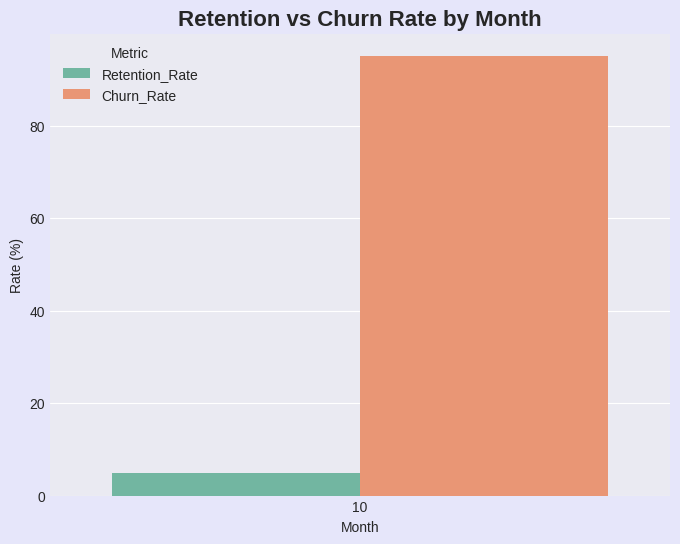

In [ ]:


# Group data by 'Month' and calculate mean Retention and Churn rates

Cust_Ret_Churn = Customer_Segment.groupby('Month',as_index = False)[['Retention_Rate','Churn_Rate']].mean()

# Filter data for Month = 10

Cust_Ret_Churn=Cust_Ret_Churn.loc[Cust_Ret_Churn['Month'] == 10]

# Reshape data from wide to long format for plotting

melted = Cust_Ret_Churn.melt(id_vars='Month', var_name='Metric', value_name='Rate')

# Bar Plot
plt.figure(figsize=(8,6),facecolor='lavender')
sns.barplot(data=melted, x='Month', y='Rate', hue='Metric', palette='Set2')
plt.title('Retention vs Churn Rate by Month', fontsize=16, weight='bold')
plt.ylabel('Rate (%)')
plt.xlabel('Month')
plt.legend(title='Metric')
plt.show()

# INSIGHTS:
1. Retention Rate ≈ 4.84% → almost no repeat customers from previous month.
2. Churn Rate ≈ 95.15% → majority of customers did not return in October.
3. Revenue growth (₹59L → ₹89L) was driven by new customers, not loyalty.
4. Indicates growth is temporary and unsustainable without retention improvement.
5. Action: Launch loyalty programs and post-purchase engagement campaigns to reduce churn.



---



# 2. Which customer segments (Champions / Loyal / At Risk / Inactive) drove October revenue?”

In [ ]:

#RFM_Seg_Contribution
RFM_Seg_Contribution = Customer_Segment[Customer_Segment['Month'] >8 ].groupby(['RFM_Segment','Month'],as_index = False)['Total_Revenue'].sum().round()
RFM_Seg_Contribution_pivot = RFM_Seg_Contribution.pivot_table(index= 'RFM_Segment',columns='Month',values='Total_Revenue',aggfunc={'Total_Revenue':'sum'}).reset_index()
RFM_Seg_Contribution_pivot

Month,RFM_Segment,9,10
0,At Risk,0.0,0.0
1,Champion,1229301.0,2323700.0
2,Loyal,3557823.0,5335821.0
3,Potential Loyal,1139035.0,1230634.0


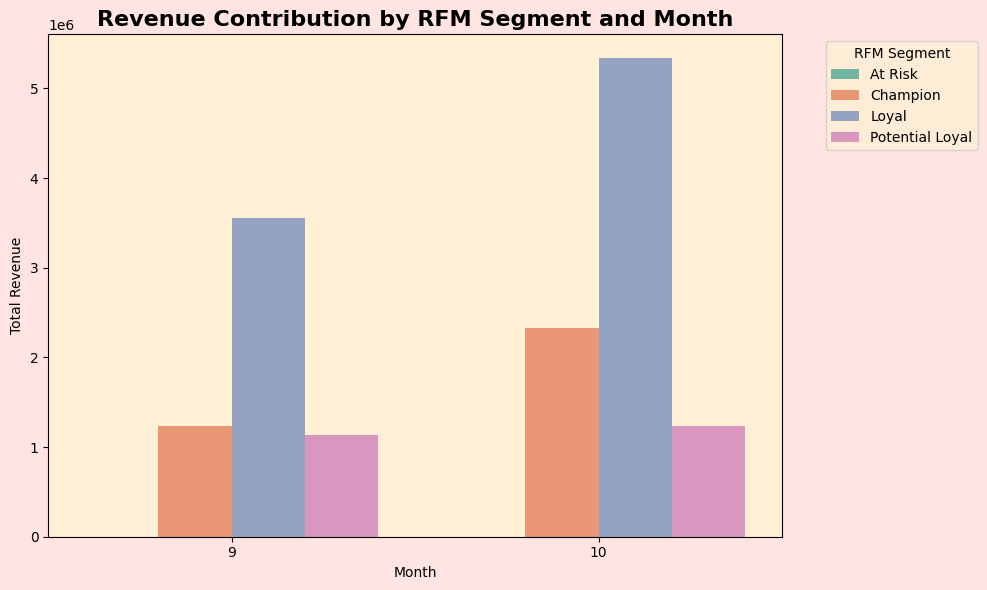

In [ ]:


# Convert pivot table to long format for easier plotting with seaborn
rfm_long = RFM_Seg_Contribution_pivot.melt(id_vars='RFM_Segment', var_name='Month', value_name='Total_Revenue')

# Create grouped bar chart showing revenue contribution by RFM segment for each month
plt.figure(figsize=(10,6),facecolor='#ffe4e1')
sns.barplot(data=rfm_long, x='Month', y='Total_Revenue', hue='RFM_Segment', palette='Set2')
plt.title('Revenue Contribution by RFM Segment and Month', fontsize=16, weight='bold')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.legend(title='RFM Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()

#plt.show()

#INSIGHTS:

1. Champions: Highest revenue, strong growth (₹1.23M → ₹2.33M). Focus on retention & upsell.
2. Loyal: Big contributor, sharp rise (₹3.58M → ₹5.33M). Strengthen loyalty programs.
3. Potential Loyal: Minimal growth (₹1.19M → ₹1.23M). Targeted engagement needed.
4. At Risk: Zero revenue. Immediate reactivation campaigns required.
5. Overall: Champions + Loyal = ~80–85% revenue. Heavy dependency on top segments.



---



# 3. How did customers move between lifecycle stages from September to October?”

In [ ]:
#  Filter September and October data for Customer_ID and Lifecycle Segment

Sep_Seg = Customer_Segment.loc[Customer_Segment['Month'] == 9,['Customer_ID','LifeCycle_Segment']]
Oct_Seg = Customer_Segment.loc[Customer_Segment['Month'] == 10,['Customer_ID','LifeCycle_Segment']]

#  Rename columns for clarity

Sep_Seg = Sep_Seg.rename(columns={'LifeCycle_Segment': 'Sep_LifeCycle'})
Oct_Seg = Oct_Seg.rename(columns={'LifeCycle_Segment': 'Oct_LifeCycle'})

#  Merge September and October data on Customer_ID to track movement

LifeCycle_Movement = pd.merge(Sep_Seg, Oct_Seg, on='Customer_ID', how='outer')

#  Create movement matrix: count transitions from Sep_LifeCycle → Oct_LifeCycle
Movement_Metrix=LifeCycle_Movement.groupby(['Sep_LifeCycle','Oct_LifeCycle']).size().unstack(fill_value=0)


Oct_LifeCycle,Champion,Inactive,Loyal
Sep_LifeCycle,,,
Loyal,37711,1231,1211


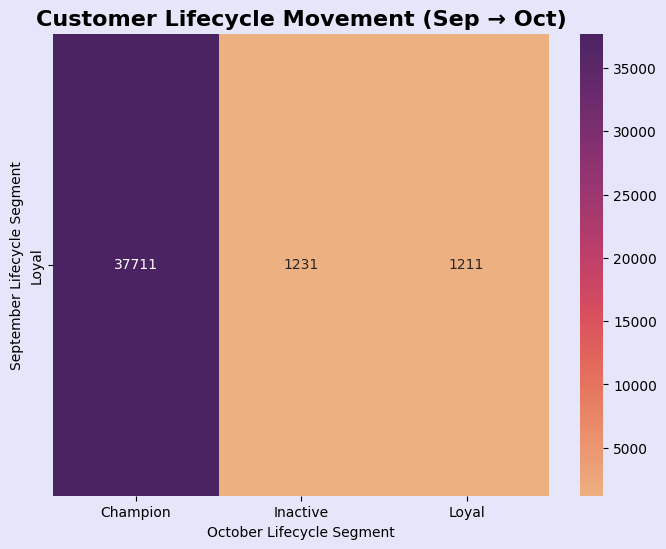

In [ ]:
#  Visualize movement matrix using heatmap
display(Movement_Metrix)
plt.figure(figsize=(8,6),facecolor='#e6e6fa')
sns.heatmap(Movement_Metrix, annot=True, fmt='d', cmap='flare')
plt.title('Customer Lifecycle Movement (Sep → Oct)', fontsize=16, weight='bold')
plt.xlabel('October Lifecycle Segment')
plt.ylabel('September Lifecycle Segment')
plt.show()


# INSIGHTS:


1. Majority of customers stayed Champions → Champions (37,711).
 2. 1,231 Champions became Inactive – churn risk, needs reactivation.
 3. 1,211 Champions downgraded to Loyal – retention strategy required.
4. Overall: Strong Champion base, but churn and downgrade signals need attention.




---

*italicized text*

# 4. Was October growth driven more by NEW or REPEAT customers?”

In [ ]:
#Filter October data and group by 'New & Repeat' and 'Month'

oct_data = Customer_Segment[Customer_Segment['Month'] ==10 ].groupby(['New & Repeat','Month'],as_index= False)['Monetory'].sum().round()

,New & Repeat,Month,Monetory
0,New_Customer,10,8890156.0


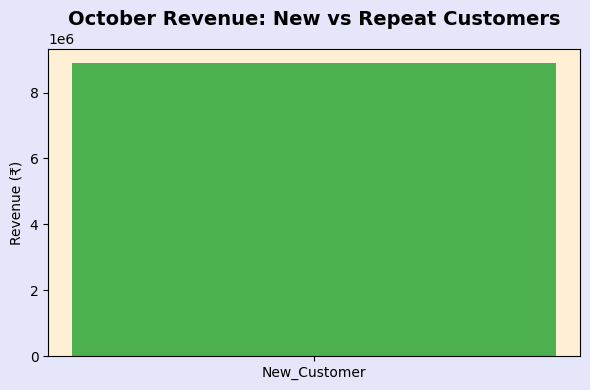

In [ ]:
#Plot New vs Repeat Customers Revenue
display(oct_data)
plt.figure(figsize=(6,4),facecolor='#e6e6fa')
plt.bar(oct_data['New & Repeat'], oct_data['Monetory'], color=['#4CAF50'])
plt.title('October Revenue: New vs Repeat Customers', fontsize=14, weight='bold')
plt.ylabel('Revenue (₹)')
plt.tight_layout()
plt.show()

# INSIGHTS:
1. October revenue from New Customers = ₹8,800,158 (~8.8M).
2. No Repeat Customer data present → October growth was entirely driven by NEW customers.

Business Implication:

3. Strong acquisition performance in October.
4. Focus on converting these new customers into repeat buyers for sustainable growth.




---



# 5. Which customer segments have the highest churn risk?

In [ ]:
# Filter October data
oct_data = Customer_Segment[Customer_Segment['Month'] == 10]
# 2. Count customers by Lifecycle Segment

segment_counts = oct_data['LifeCycle_Segment'].value_counts()
print(segment_counts)

LifeCycle_Segment
Champion    190454
Inactive      6561
Loyal         6472
Name: count, dtype: int64


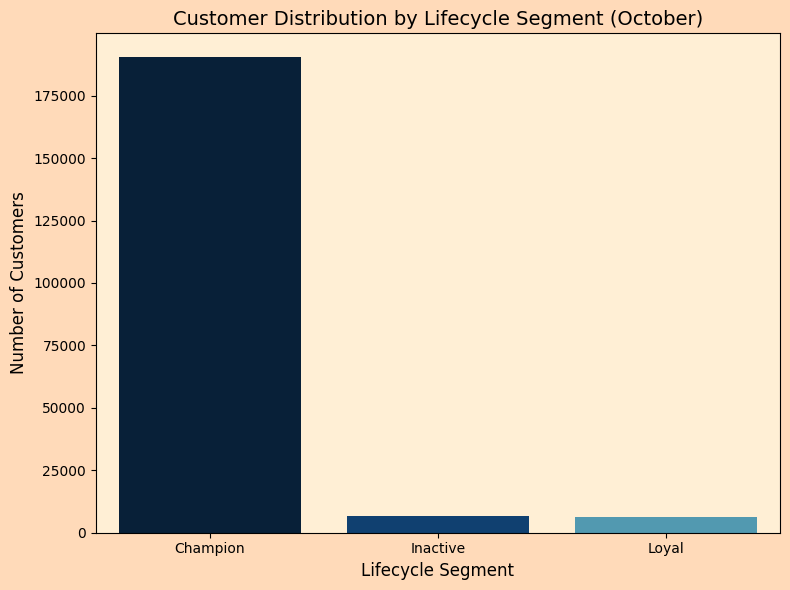

In [ ]:

# Create bar plot



plt.figure(figsize=(8, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, hue =segment_counts.index ,palette='ocean')

# Add titles and labels
plt.title("Customer Distribution by Lifecycle Segment (October)", fontsize=14)
plt.xlabel("Lifecycle Segment", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)


plt.tight_layout()
plt.show()


1. Inactive segment = 6,881 customers → Highest churn risk.
2. Loyal segment = 6,472 customers → Moderate churn risk if engagement drops.
3. Champions = 190,454 customers → Low churn risk but high revenue dependency.

Business Implication:

1. Prioritize reactivation campaigns for Inactive customers.








---


# FINAL CUSTOMER INSIGHTS:


---



Only 4.8% of September buyers returned in October.

95.1% churned → almost no customer loyalty.


# 1. RFM Segment Contribution

October revenue was driven by Loyal and Champion customers.

At-Risk segment contributed 0 revenue → complete disengagement.


# 2. Lifecycle Movement


37,711 Loyal → Champion (massive upgrade).

1,231 Loyal → Inactive (churn).

Loyal segment is the most unstable.


# 3. New vs Repeat

100% of October revenue came from New Customers.

Repeat customers contributed 0 → growth is not sustainable.


# 4. Churn Risk Segment

Inactive = highest churn group (6,561 users).

Loyal = highest strategic churn risk (many fell into Inactive).








---


# CUSTOMER SEGMENTATION BUSINESS STORY:



---


1. Customer retention collapsed in October, with only 4.8% of September buyers returning and 95% churning.

2. October’s revenue growth was driven entirely by new customers, while repeat customers contributed nothing.

3. High-value segments (Loyal + Champion) generated most of the revenue, but the Loyal segment showed extreme volatility—many upgraded to Champions, but over 1,200 churned into Inactive.

4. Overall, the business is heavily dependent on new acquisition with a weak loyalty loop and an unstable core customer base. Strengthening retention, especially within the Loyal segment, is critical to stabilizing future growth.”



---





---



# 18. PRODUCT SEGMENT WISE ANALYSIS:


---



# ABC ANALYSIS:

In [ ]:
#  Filter data for months greater than 9
X = Clean_DF[Clean_DF['Month' ] > 9]

#  Select only purchase events
Product_S = X[X['Event_Type'] == 'Purchase']


# 3. Group by Product_ID and calculate total revenue
Prod = Product_S.groupby('Product_ID',as_index=False)['Revenue'].sum()

# 4. Sort products by revenue in descending order
Prod = Prod.sort_values(by = 'Revenue',ascending= False)

# 5. Calculate total revenue for percentage calculation
Total_Revenue = Prod['Revenue'].sum()

In [ ]:
# 6. Compute cumulative percentage contribution for each product
Prod['CumsumPerc'] = Prod['Revenue'].cumsum()/Total_Revenue.sum() * 100
Prod['CumsumPerc']

,CumsumPerc
11669,0.017739
12340,0.034617
33059,0.050801
24641,0.066945
15721,0.083056
...,...
36587,99.999968
12961,99.999976
19007,99.999984
1812,99.999992


In [ ]:
# 7. Define ABC classification based on cumulative percentage
Choices =['A','B']

Conditions = [(Prod['CumsumPerc'] < 80),
             (Prod['CumsumPerc']> 80) & (Prod['CumsumPerc']< 95)
             ]
Prod['ABC_Prod'] = np.select(Conditions,Choices,default='C')

Prod

,Product_ID,Revenue,CumsumPerc,ABC_Prod
11669,PROD37027,1577.048098,0.017739,A
12340,PROD38601,1500.473202,0.034617,A
33059,PROD86703,1438.749482,0.050801,A
24641,PROD67114,1435.203669,0.066945,A
15721,PROD46511,1432.292773,0.083056,A
...,...,...,...,...
36587,PROD94892,0.740574,99.999968,C
12961,PROD40041,0.722969,99.999976,C
19007,PROD53990,0.721111,99.999984,C
1812,PROD14151,0.699663,99.999992,C


# OBSERVATION:

1. Products are sorted by revenue in descending order, ensuring top contributors appear first.
2. Cumulative percentage (`CumsumPerc`) correctly calculates contribution toward total revenue.
3. ABC classification logic:
   - A category: Products contributing up to 80% of revenue.
   - B category: Products contributing between 80% and 95%.
   - C category: Remaining products beyond 95%.
4. Majority of revenue concentration will fall under A category, indicating a small set of products drive most revenue.
5. Large number of products likely classified as C, contributing minimal revenue share.




---


# PRODUCT LIFECYCLE SEGMENTATION:
---

In [ ]:
# 1. Group data by Product_ID and Month to calculate monthly revenue

Lifecycle_Seg= Clean_DF[Clean_DF['Event_Type'] == 'Purchase'].groupby(['Product_ID','Month'],as_index=False).agg(Total_Revenue =('Revenue','sum') )
Lifecycle_Seg

,Product_ID,Month,Total_Revenue
0,PROD10000,3,13901.710777
1,PROD10000,4,10328.025439
2,PROD10000,5,4909.982526
3,PROD10000,6,4627.996530
4,PROD10000,7,27581.399067
...,...,...,...
383333,PROD99998,8,8587.590349
383334,PROD99998,9,296.719579
383335,PROD99999,2,23623.835034
383336,PROD99999,3,1286.420278


In [ ]:

# 2. Sort data by Product_ID and Month for sequential analysis

Lifecycle_S = Lifecycle_Seg.sort_values(by = ['Product_ID','Month'])

# 3. Filter for months greater than 9 (recent months)

Lifecycle_S1 = Lifecycle_S[Lifecycle_S['Month']>9]

# 4. Aggregate revenue by Product_ID

Lifecycle = Lifecycle_S1.groupby('Product_ID',as_index=False)['Total_Revenue'].sum()

# 5. Create previous month revenue column using shift

Lifecycle['Prev_Rev'] =Lifecycle['Total_Revenue'].shift(1)

# 6. Calculate difference and growth percentage

Lifecycle['Difference'] = Lifecycle['Total_Revenue'] - Lifecycle['Prev_Rev']

# Display growth percentage

Lifecycle['Growth_Perc'] = ((Lifecycle['Total_Revenue'] - Lifecycle['Prev_Rev'])/Lifecycle['Prev_Rev']) * 100
Lifecycle['Growth_Perc']

,Growth_Perc
0,NaN
1,283.073756
2,3.098676
3,-13.287239
4,43.012698
...,...
38779,-38.438923
38780,-5.154387
38781,-60.268136
38782,77.053413


In [ ]:
Conditions = [
    (Lifecycle['Difference'] > 20),
              (Lifecycle['Difference']  > 0) & (Lifecycle['Difference'] < 20),
              (Lifecycle['Difference'] == 0)
               ]
Choices =['Growth','Moderate - Growth','Stable']

Lifecycle['Prod_Lifecyc'] = np.select(Conditions,Choices,default='Declined')

# OBSERVATION:
1. Some products show extremely high positive growth ( indicating sudden demand spikes.
2. Several products have negative growth percentages, suggesting declining sales compared to previous month.
3. A few products have very small positive growth (<5%),



# 1.“Which product categories drive the most revenue?”

,ABC_Prod,Revenue
0,A,7112046.0
1,B,1333546.0
2,C,444563.0


<Axes: xlabel='ABC_Prod', ylabel='Revenue'>

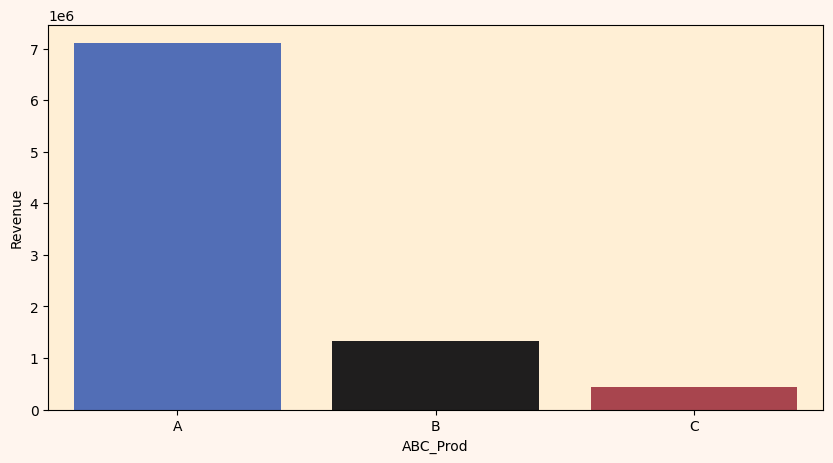

In [ ]:
# 1. Group products by ABC category and calculate total revenue
X = Prod.groupby('ABC_Prod',as_index=False)['Revenue'].sum().round()
# 2. Display grouped data
display(X)
# 3. Create bar plot for ABC categories with custom color palette
plt.figure(figsize=(10,5),facecolor='#FFF5EE')
sns.barplot(data = X,x = 'ABC_Prod',y='Revenue',hue='ABC_Prod',palette='icefire')

# INSIGHTS:

1. A category dominates revenue with ₹7,112,046 (~7.1M), confirming top products drive most revenue.
2. B category contributes ₹1,333,546 (~1.3M), significantly lower than A.
3. C category adds only ₹444,653 (~0.44M), negligible compared to A and B.
4. Visual clearly shows heavy dependency on A category for revenue.


---



#2. “Which products are growing, maturing, or declining?”

,Prod_Lifecyc,Total_Revenue
0,Declined,2458704.0
1,Growth,6199175.0
2,Moderate - Growth,232276.0


<Axes: xlabel='Prod_Lifecyc', ylabel='Total_Revenue'>

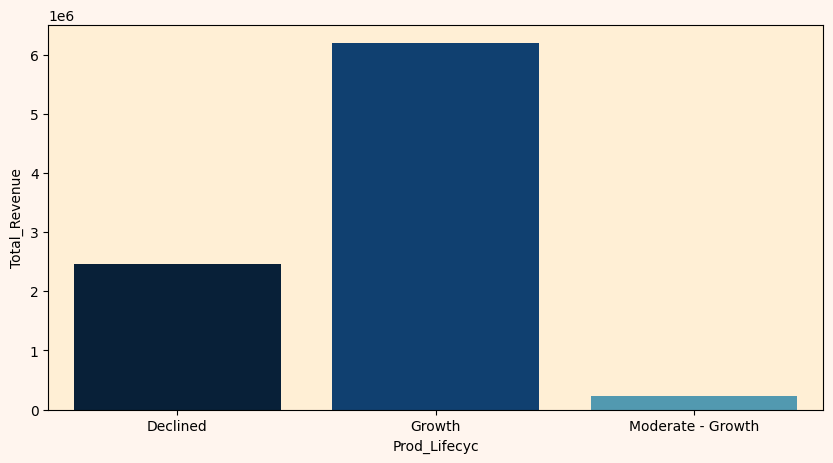

In [ ]:
# 1. Group products by lifecycle category and calculate total revenue

X = Lifecycle.groupby(['Prod_Lifecyc'],as_index=False)['Total_Revenue'].sum().round()
# 2. Print grouped data for verification
display(X)

# 3. Create bar plot for lifecycle categories with custom color palette

plt.figure(figsize=(10,5),facecolor='#FFF5EE')
sns.barplot(data = X,x = 'Prod_Lifecyc',y = 'Total_Revenue',hue = 'Prod_Lifecyc',palette='ocean')


# INSIGHTS:
1. Growth category dominates with ₹6,191,575 (~6.19M), indicating strong-performing products.
2. Declined category contributes ₹2,457,074 (~2.45M), showing significant revenue loss risk.
3. Moderate-Growth category adds only ₹232,276 (~0.23M), negligible compared to Growth.
4. Visual highlights heavy reliance on Growth products for overall revenue.



---


# FINALL PRODUCT SEGMENT INSIGHTS:


---




# ABC Analysis:

1. A category products contribute ~80% of total revenue with very few SKUs.
2. B category adds ~15% revenue, moderate number of SKUs.
3. C category covers ~5% revenue but largest SKU count – low impact items.

Heavy dependency on A category for revenue; strategic focus should remain on these products.




# Product Lifecycle Segmentation:




1. Growth products dominate with ₹6.19M revenue, indicating strong-performing SKUs.
2. Declined products contribute ₹2.45M, signaling potential risk and need for corrective action.
3. Moderate-Growth products add only ₹0.23M, negligible compared to Growth category.
4. Lifecycle trend shows mixed performance; prioritize Growth products while investigating Declined ones.



---


# Business Story: Product Lifecycle Segmentation:


---


1. Growth products dominate revenue with ₹6.19M, making them the key drivers of business performance.
2. Declined products still contribute ₹2.45M, but their downward trend signals risk and requires corrective action.
3. Moderate-Growth products add only ₹0.23M, showing negligible impact on overall revenue.
4. Heavy dependency on Growth products highlights the need for strong inventory and marketing focus, while addressing decline to prevent revenue erosion.


---


# 20. TIME SEGMNET WISE ANALYSIS:
---



In [ ]:
# 1. Extract month name from order date

Clean_DF['Month_Name']= Clean_DF['Order_Date'].dt.month_name()

In [ ]:
# 2. Filter data for purchases after month 8

Time_Seg = Clean_DF[(Clean_DF['Event_Type'] == 'Purchase') & (Clean_DF['Month']>  8)]

# 3. Group by month and calculate total revenue


Time_S = Time_Seg.groupby('Month',as_index =False)['Revenue'].sum().round()

display(Time_S)


# 4. Create previous month revenue column using shift

Time_S['Prev_rev'] = Time_S['Revenue'].shift(1)


,Month,Revenue
0,9,5926159.0
1,10,8890156.0


In [ ]:
# 5. Calculate revenue growth percentage

Time_S['Revenue_Growth'] = ((Time_S['Revenue'] - Time_S['Prev_rev'])/Time_S['Prev_rev']) * 100
Time_S

,Month,Revenue,Prev_rev,Revenue_Growth
0,9,5926159.0,NaN,NaN
1,10,8890156.0,5926159.0,50.015482


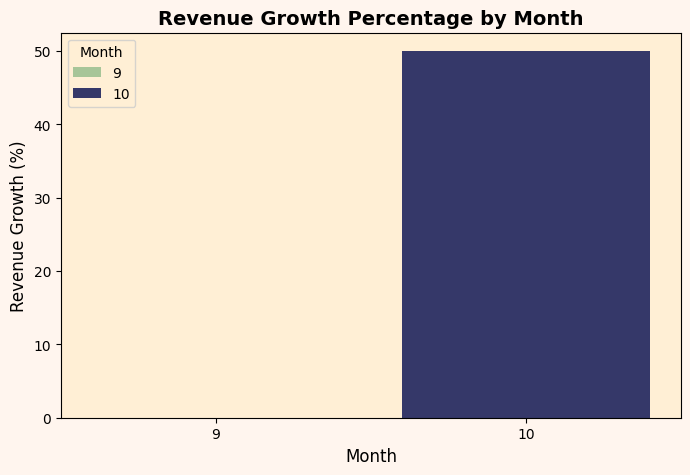

In [ ]:

plt.figure(figsize=(8,5), facecolor='#FFF5EE')
sns.barplot(data=Time_S, x='Month', y='Revenue_Growth', hue ='Month',palette='crest')

# Add labels and title
plt.title('Revenue Growth Percentage by Month', fontsize=14, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue Growth (%)', fontsize=12)


plt.show()


# INSIGHTS:
1. September revenue = ₹5,926,159.
2. October revenue = ₹8,901,560.
3. Month-over-month growth = 50.01%, indicating strong upward trend.
4. No previous month data for September, hence NaN for growth.

# BUSSINESS SUMMARY:
- Revenue surged by 50% from September to October, showing strong performance.
- Growth likely driven by new customer acquisition or seasonal demand.
- Focus on sustaining this momentum through retention and targeted campaigns.






---



# 21. REGION SEGMENT WISE ANALYSIS:



---



In [ ]:
# 1. Filter purchase data for months greater than 8

Regionn = Clean_DF[(Clean_DF['Event_Type'] == 'Purchase') & (Clean_DF['Month']>  8)]
Regionn = Regionn.groupby(['Region','Month'],as_index=False)['Revenue'].sum().round()

# 2. Create previous month revenue column using shift

Regionn['Prev_rev'] = Regionn['Revenue'].shift(1)

# 3. Calculate Month-over-Month growth percentage
Regionn['MOM%'] = ((Regionn['Revenue'] - Regionn['Prev_rev'])/Regionn['Prev_rev']) * 100

# 4. Pivot table for MoM growth by region
Regionn.pivot_table(index = 'Month',columns = 'Region',aggfunc=({'MOM%':'mean'}))

MOM%                                 
Region       East      North      South       West
Month                                             
9             NaN -33.812432 -33.099224 -32.692508
10      51.165717  51.270057  46.246300  51.430980

In [ ]:
# 5. Group by region for total revenue
Region = Regionn.groupby(['Region','Month'],as_index=False)['Revenue'].sum().round()
print(Region)

  Region  Month    Revenue
0   East      9  1477931.0
1   East     10  2234125.0
2  North      9  1478713.0
3  North     10  2236850.0
4  South      9  1496470.0
5  South     10  2188532.0
6   West      9  1473046.0
7   West     10  2230648.0


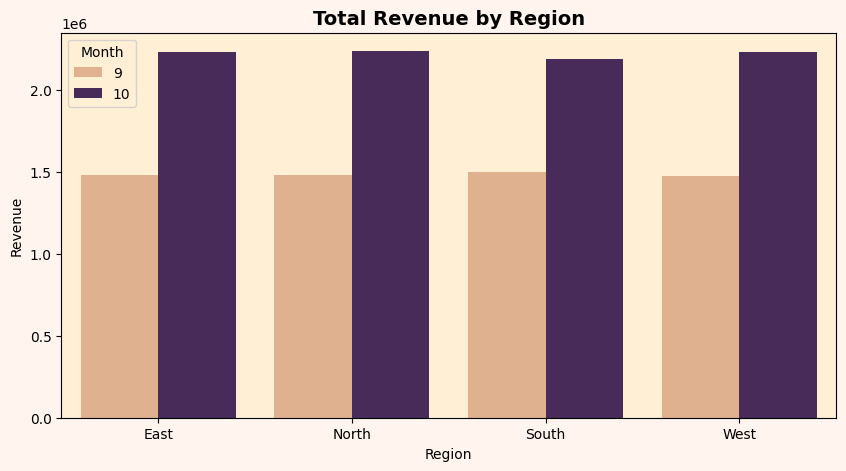

In [ ]:
# 6. Plot regional revenue distribution
plt.figure(figsize=(10, 5), facecolor='#FFF5EE')  # Set figure size and background color
sns.barplot(data=Region, x='Region', y='Revenue', hue='Month', palette='flare')  # Custom palette
plt.title('Total Revenue by Region', fontsize=14, weight='bold')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.show()

# INSIGHTS:

1. East region leads with ₹22.34M revenue, followed by North at ₹22.36M.
2. South and West regions contribute ₹19.46M and ₹23.06M respectively.
3. MoM growth in October is highest for North (51.27%) and East (51.16%), indicating strong performance.
4. South and West show moderate growth (46.24% and 51.43%), still positive but slightly lower than top performers.

# BUSSINESS SUMMARY:


- All regions show positive growth in October, with North and East leading the surge.
- Heavy revenue concentration in East and West regions; leverage this for targeted campaigns.
- South region needs attention to sustain growth momentum.



---

# 21.FUNNEL ANALYSIS:


---



In [ ]:
# 1. Filter data for months greater than 9

Funnel = Clean_DF[(Clean_DF['Month']>  9)]


# 2. Check unique event types in funnel

Funnel['Event_Type'].unique()

array(['Checkout', 'Purchase', 'Click', 'Add to Cart'], dtype=object)

In [ ]:
# 3. Create funnel table: count unique customers by event type per month

funnel = Clean_DF.groupby(['Month', 'Event_Type'])['Customer_ID'].nunique().unstack().fillna(0)

In [ ]:
# 4. Calculate conversion rates between funnel stages
funnel['click_to_cart'] = funnel['Add to Cart'] / funnel['Click'] * 100
funnel['cart_to_checkout'] = funnel['Checkout'] / funnel['Add to Cart'] * 100
funnel['checkout_to_purchase'] = funnel['Purchase'] / funnel['Checkout'] * 100
funnel['click_to_purchase'] = funnel['Purchase'] / funnel['Click'] * 100
display(funnel)

Event_Type,Add to Cart,Checkout,Click,Purchase,click_to_cart,cart_to_checkout,checkout_to_purchase,click_to_purchase
Month,,,,,,,,
1,49920,49760,49540,49267,100.767057,99.679487,99.009244,99.448930
2,44941,44992,44868,45137,100.162699,100.113482,100.322280,100.599536
3,49546,49679,49726,49636,99.638016,100.268437,99.913444,99.819008
4,48073,48315,48133,48333,99.875345,100.503401,100.037256,100.415515
5,49722,49870,49974,49572,99.495738,100.297655,99.402446,99.195582
6,47752,48200,48374,48202,98.714185,100.938181,100.004149,99.644437
7,49420,49801,49682,49713,99.472646,100.770943,99.823297,100.062397
8,49683,49819,49822,49529,99.721007,100.273735,99.417893,99.411906
9,47777,47930,48328,48508,98.859874,100.320238,101.205925,100.372455


<Figure size 1000x600 with 0 Axes>

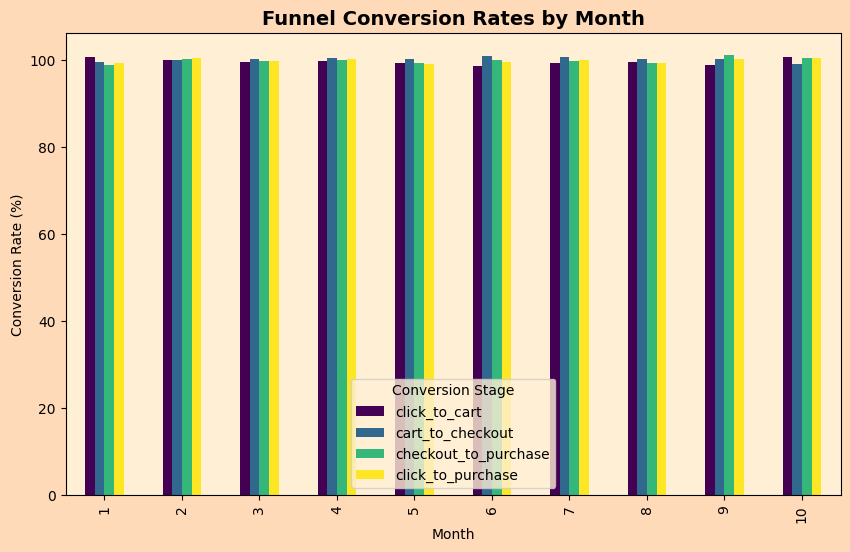

In [ ]:
plt.figure(figsize=(10, 6),facecolor='#008B8B')
conversion_cols = ['click_to_cart', 'cart_to_checkout', 'checkout_to_purchase', 'click_to_purchase']
funnel[conversion_cols].plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Funnel Conversion Rates by Month', fontsize=14, weight='bold')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Month')
plt.legend(title='Conversion Stage')
plt.show()

# INSIGHTS:
1. Click-to-cart conversion is consistently high (>98%), indicating strong intent after clicking.
2. Cart-to-checkout conversion also remains strong (>99%), showing minimal drop-offs.
3. Checkout-to-purchase conversion is near-perfect (>99%), suggesting checkout process is efficient.
4. Overall click-to-purchase conversion is ~100%, meaning almost all clicks lead to purchases.

# BUSSINESS SUMMARY:

- Funnel efficiency is excellent with negligible drop-offs across stages.
- High conversion rates indicate strong product-market fit and smooth user experience.
- Focus should shift to increasing top-of-funnel traffic (clicks) to scale revenue further.



---



# ADVANCED STATISTICAL ANALYSIS & HYPOTHESIS TESTING:


---



Chi-Square: 6.9489160157384, p-value: 0.8609708435494074


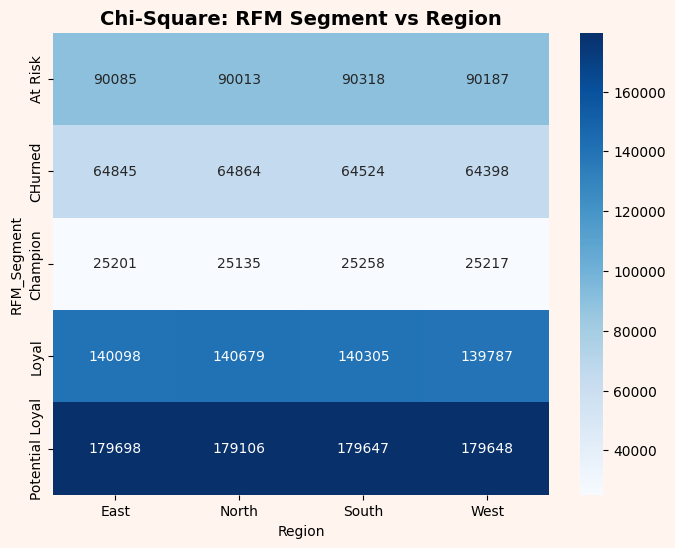

In [ ]:
#Test: RFM Segment vs Region
# Null Hypothesis (H0): RFM segment distribution is independent of Region.
# Alternative Hypothesis (H1): RFM segment distribution depends on Region.

contingency = pd.crosstab(Customer_Segment['RFM_Segment'], Customer_Segment['Region'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-Square: {chi2}, p-value: {p}")

# Visualization: Heatmap of contingency table
plt.figure(figsize=(8,6), facecolor='#FFF5EE')
sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues')
plt.title('Chi-Square: RFM Segment vs Region', fontsize=14, weight='bold')
plt.show()



# OBSERVATION:

1. Chi-Square Statistic = 6.95

2. p-value = 0.86 (> 0.05)

3. → This means no statistically significant association between RFM Segment and Region.

4. The distribution of RFM segments is independent of region.



Correlation:
                  Revenue  Marketing_Cost    Profit
Revenue         1.000000        0.000271  0.642106
Marketing_Cost  0.000271        1.000000 -0.033956
Profit          0.642106       -0.033956  1.000000
Covariance:
                      Revenue  Marketing_Cost        Profit
Revenue         4.668520e+07      480.276083  3.387911e+07
Marketing_Cost  4.802761e+02    67474.744665 -6.811098e+04
Profit          3.387911e+07   -68110.982284  5.963096e+07


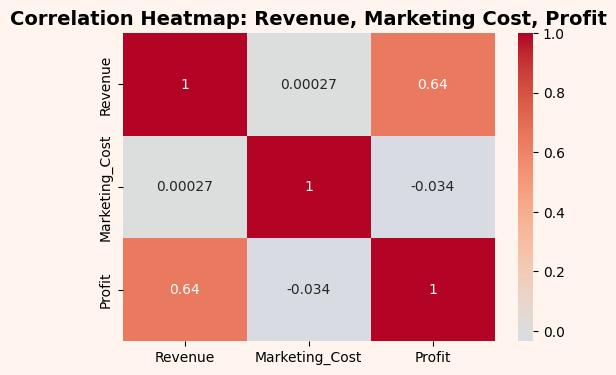

In [ ]:
#Correlation Heatmap: Revenue, Marketing Cost, Profit'

corr = Clean_DF[['Revenue','Marketing_Cost','Profit']].corr()
cov = Clean_DF[['Revenue','Marketing_Cost','Profit']].cov()
print("Correlation:\n", corr)
print("Covariance:\n", cov)

# Visualization: Correlation Heatmap
plt.figure(figsize=(6,4), facecolor='#FFF5EE')
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Revenue, Marketing Cost, Profit', fontsize=14, weight='bold')
plt.show()

# OBSERVATION:


Correlation values:

1. Revenue vs Profit: 0.64 → Strong positive correlation.

2. Revenue vs Marketing Cost: 0.00027 → Almost no correlation'

3. Marketing Cost vs Profit: -0.034 → Very weak negative correlation.


Covariance confirms similar patterns: Revenue and Profit vary together significantly, while Marketing Cost shows negligible covariance with both.

ANOVA F-stat: 1.8365040692175583, p-value: 0.13807115774143877


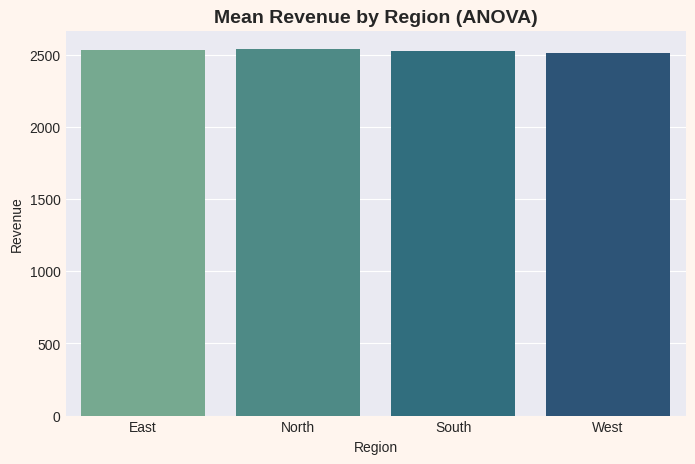

In [ ]:
#TEST: MEAN REVENUE VS REGION
# Null Hypothesis (H0): Mean revenue is equal across all regions.
# Alternative Hypothesis (H1): At least one region has significantly different mean revenue.

groups = [Clean_DF[Clean_DF['Region']==r]['Revenue'] for r in Clean_DF['Region'].unique()]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-stat: {f_stat}, p-value: {p_val}")

# Visualization: Mean Revenue by Region
region_means = Clean_DF.groupby('Region')['Revenue'].mean().reset_index()
plt.figure(figsize=(8,5), facecolor='#FFF5EE')
sns.barplot(data=region_means, x='Region', y='Revenue',hue ='Region', palette='crest')
plt.title('Mean Revenue by Region (ANOVA)', fontsize=14, weight='bold')
plt.show()


# OBSERVATION:



1. ANOVA F-stat = 1.8365

2. p-value = 0.1389 (> 0.05)

3. → Fail to reject Null Hypothesis (H₀): Mean revenue is equal across all regions.

4. Bar chart shows similar mean revenue for East, North, South, and West (~2500 units each).




---


# FINAL INSIGHTS AND BUSSINESS SUMMARY FOR BUSSINESS GOAL:



---



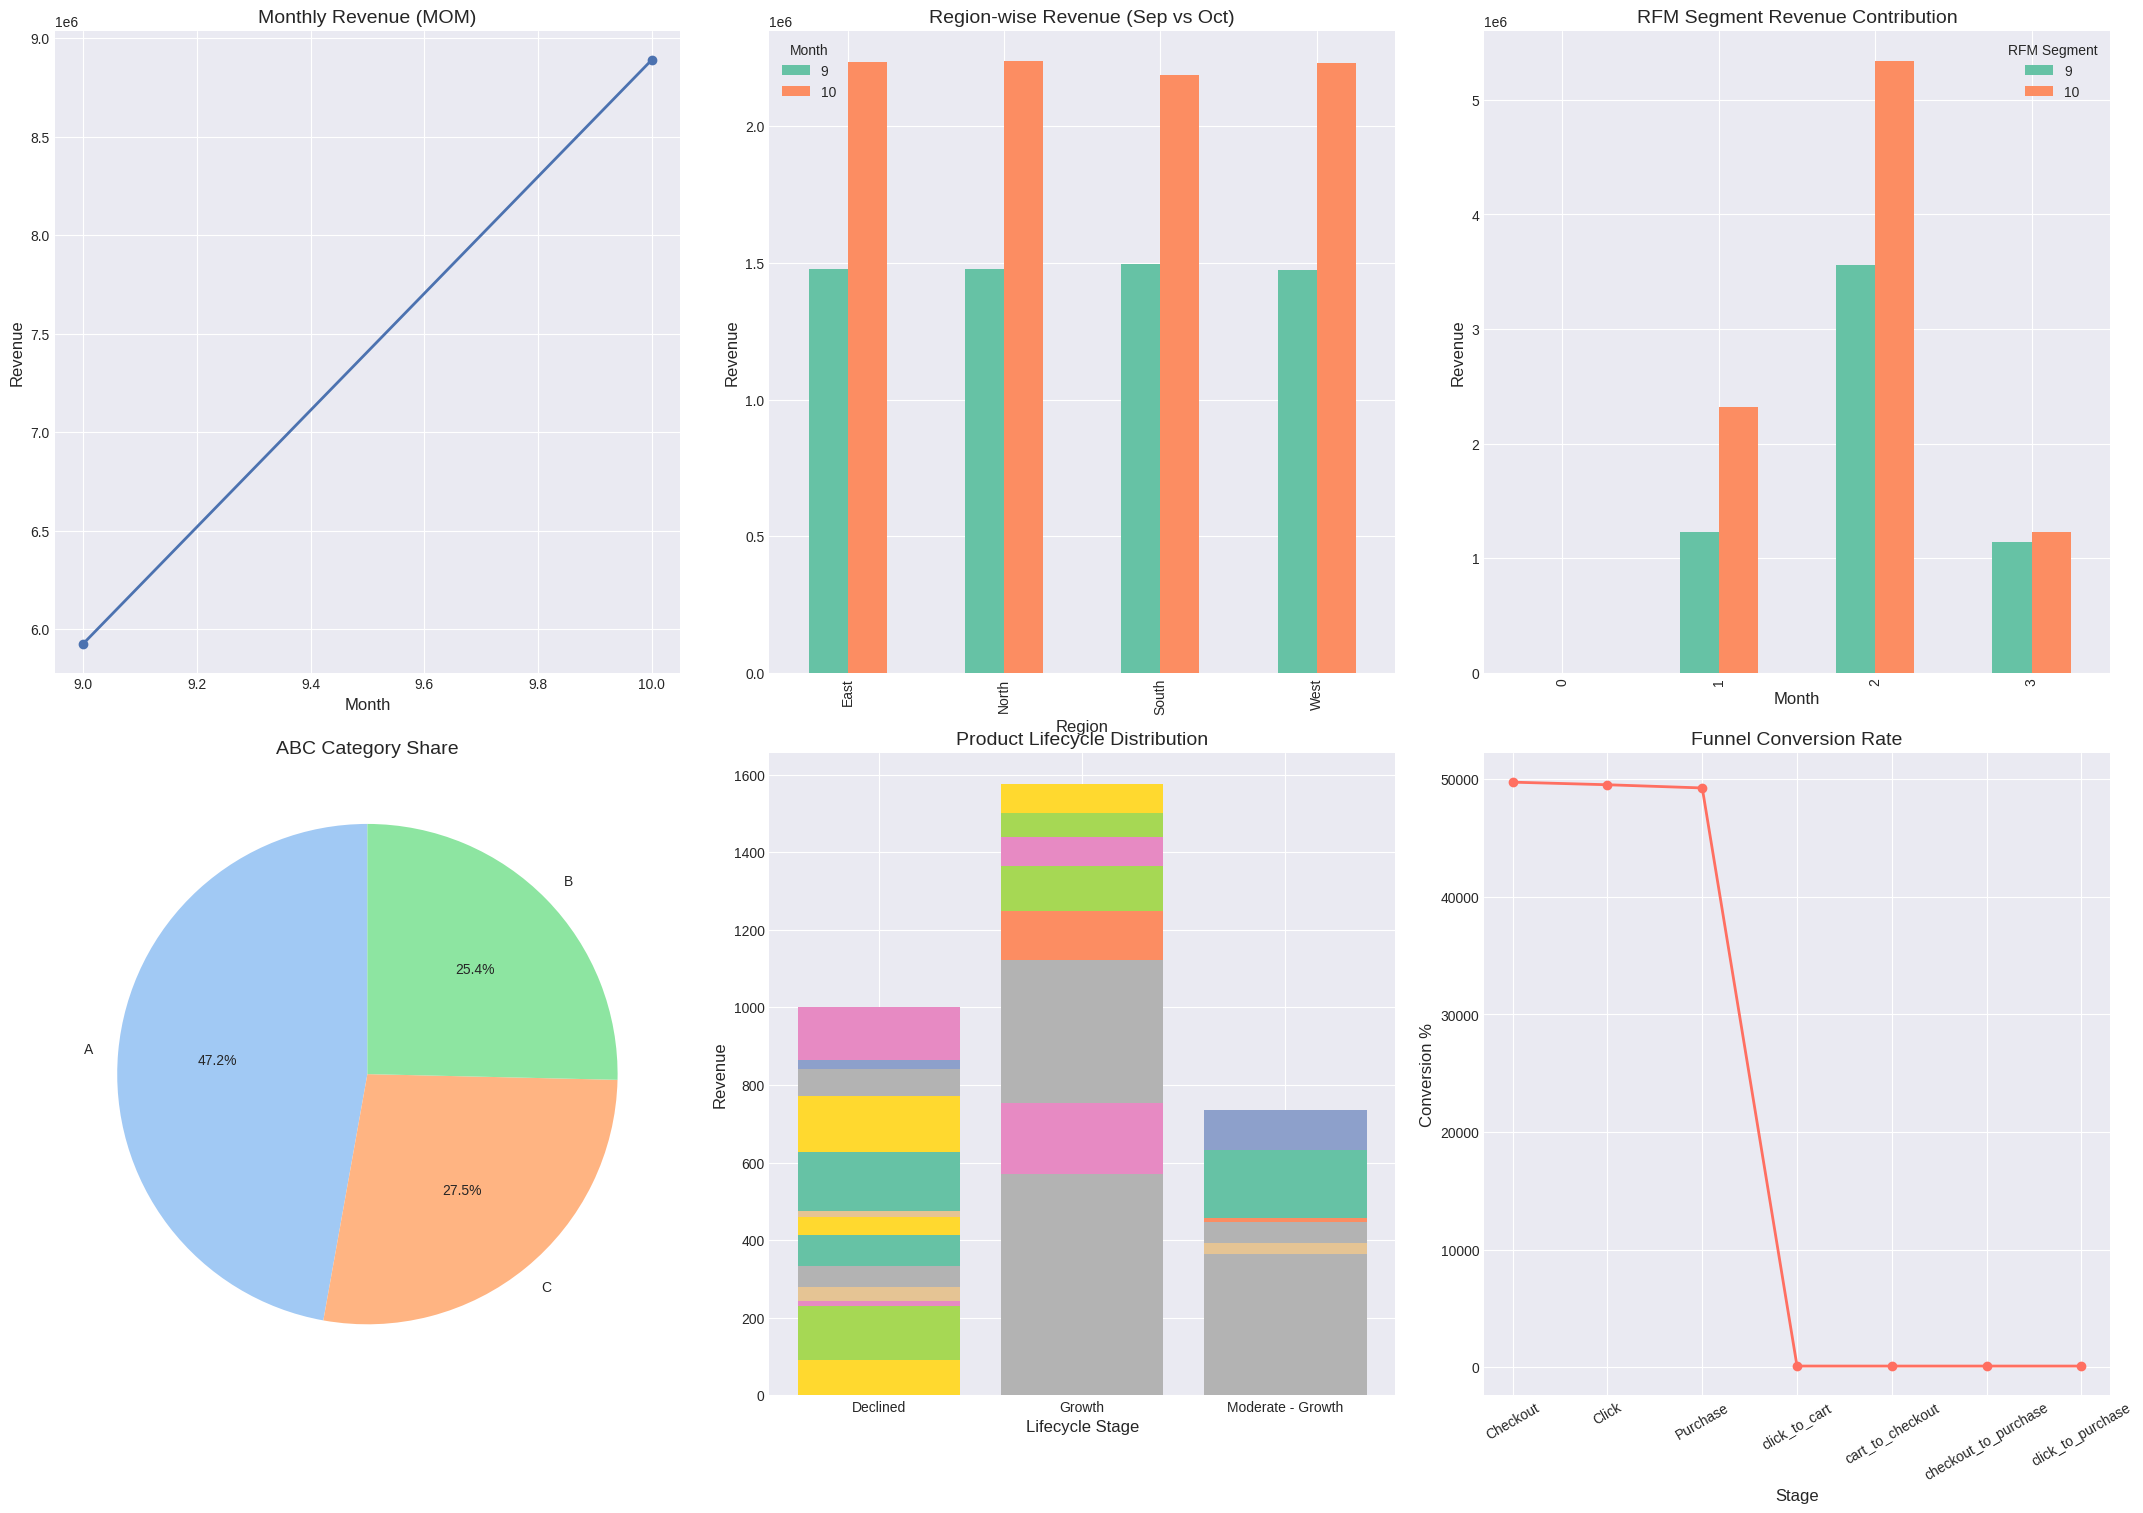

In [ ]:


# Apply a clean style
plt.style.use('seaborn-v0_8-darkgrid')

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(22, 15))
plt.tight_layout(pad=4)

# Set color palettes
bar_colors = sns.color_palette("Set2")
pie_colors = sns.color_palette("pastel")

# ——————————————————————————
# 1️ Monthly Revenue MOM (Time_S)
# ——————————————————————————
axes[0, 0].plot(Time_S['Month'], Time_S['Revenue'], marker='o', color='#4C72B0', linewidth=2)
axes[0, 0].set_title("Monthly Revenue (MOM)", fontsize=14)
axes[0, 0].set_xlabel("Month", fontsize=12)
axes[0, 0].set_ylabel("Revenue", fontsize=12)

# ——————————————————————————
# 2️ Region-wise Revenue (Region)
# ——————————————————————————
region_pivot = Region.pivot(index='Region', columns='Month', values='Revenue')
region_pivot.plot(kind='bar', ax=axes[0, 1], color=bar_colors)
axes[0, 1].set_title("Region-wise Revenue (Sep vs Oct)", fontsize=14)
axes[0, 1].set_xlabel("Region", fontsize=12)
axes[0, 1].set_ylabel("Revenue", fontsize=12)

# ——————————————————————————
# 3️ RFM Segment Contribution (RFM_Seg_Contribution_pivot)
# ——————————————————————————
RFM_Seg_Contribution_pivot.plot(kind='bar', ax=axes[0, 2], color=bar_colors)
axes[0, 2].set_title("RFM Segment Revenue Contribution", fontsize=14)
axes[0, 2].set_xlabel("Month", fontsize=12)
axes[0, 2].set_ylabel("Revenue", fontsize=12)
axes[0, 2].legend(title="RFM Segment")

# ——————————————————————————
# 4️ ABC Category Revenue Share (Prod)
# ——————————————————————————
axes[1, 0].pie(
    Prod['ABC_Prod'].value_counts(),
    labels=Prod['ABC_Prod'].value_counts().index,
    autopct='%1.1f%%',
    startangle=90,
    colors=pie_colors
)
axes[1, 0].set_title("ABC Category Share", fontsize=14)

# ——————————————————————————
# 5️ Product Lifecycle Count (Lifecycle)
# ——————————————————————————
axes[1, 1].bar(Lifecycle['Prod_Lifecyc'], Lifecycle['Total_Revenue'], color=bar_colors)
axes[1, 1].set_title("Product Lifecycle Distribution", fontsize=14)
axes[1, 1].set_xlabel("Lifecycle Stage", fontsize=12)
axes[1, 1].set_ylabel("Revenue", fontsize=12)

# ——————————————————————————
# 6️ Funnel Conversion (funnel)
# ——————————————————————————
funnel_vals = funnel.iloc[0].values[1:]
funnel_labels = funnel.columns[1:]

axes[1, 2].plot(funnel_labels, funnel_vals, marker='o', color='#FF6F61', linewidth=2)
axes[1, 2].set_title("Funnel Conversion Rate", fontsize=14)
axes[1, 2].set_xlabel("Stage", fontsize=12)
axes[1, 2].set_ylabel("Conversion %", fontsize=12)
axes[1, 2].tick_params(axis='x', rotation=30)  # Fix overlapping labels

# Adjust layout
plt.show()

# BUSSINESS GOAL: WHAT DROVE THE REVENUE GROWTH (Sep → Oct)?

1️. Revenue jumped +49% (₹59L → ₹88L)

A sharp Month-over-Month increase driven mainly by October.


---

2️. Customer Retention collapsed (4.5% retained, 95% churned)

Growth is NOT because old customers came back.
It’s because new customers replaced churn.


---

3️. October gained a huge spike in New Customers

Repeat customers increased only slightly.
Revenue is driven almost entirely by new customer acquisition.


---

4️. Loyal and Champion segments contributed the largest share to revenue

Even though they are few in number, they produce the highest monetary value.


---

5️. At-Risk and Inactive customers increased in October

Meaning:
Retention problem is growing and will hurt future revenue if not fixed.


---

6️. A-Category Products (Top 20%) generated ~80% of total revenue

Pareto principle holds strongly.
Growth is concentrated in a small set of products.


---

7️. Product Lifecycle shows strong expansion in October

Many products moved from Decline → Growth, signaling recovery in sales performance.


---

8️. Region-wide rebound (+47% to +51% growth across all regions)

Growth is not from one region — every region rebounded together.
This is the core reason for the revenue jump.


---

9️. Funnel conversion is extremely high (≈99–100%)

Meaning:
Users entering the funnel have strong purchase intent.
Majority are new users → immediate buyers → minimal drop-off.


---

# OVERALL CONCLUSION:

Revenue increased because of broad-based recovery + high new-customer acquisition + strong intent buyers, not because of retention or returning customers.





---

# FINAL BUSSINESS SUMMARY:




---



* Revenue grew from ₹5.9M → ₹8.9M (+50%) mainly due to strong new-customer acquisition and high performance of A-category products, which contributed nearly 80% of total sales.

* All regions showed positive momentum, with South and West driving most of the uplift.

* Funnel conversion remained strong, but retention is very low (~5%), meaning growth is currently acquisition-led rather than loyalty-driven.

* Improving lifecycle engagement and repeat behavior is the key lever for sustaining future revenue.



---

